In [1]:
import os

import numpy as np
import scipy as sp
from matplotlib import pyplot as plt


import TwoPUtils

%load_ext autoreload
%autoreload 2

In [51]:
def get_block_number(sess):
    tport_times = sess.vr_data['time'].iloc[sess.teleport_inds]._values
    tstart_times = sess.vr_data['time'].iloc[sess.trial_start_inds]._values
    ITI = tstart_times[1:]-tport_times[:-1]
    block_number_trial = np.zeros(tport_times.shape)
    block_number_counter = 0
    
    
    block_number_time = np.zeros(sess.vr_data.shape[0])
    for i in range(1,tport_times.shape[-1]):
        if ITI[i-1]>60:
            block_number_counter+=1
            block_number_time[sess.teleport_inds[i-1]+1]=1
        block_number_trial[i] = block_number_counter
    
   
    return block_number_trial, np.cumsum(block_number_time)

def get_LR_trial(sess):
    lr_trial = np.zeros(sess.teleport_inds.shape)
    for i, (start,stop) in enumerate(zip(sess.trial_start_inds.tolist(),sess.teleport_inds.tolist())):
        lr_trial[i] = sess.vr_data['LR'].iloc[start+1 ]
    return lr_trial


In [111]:
KOs = {'4467975.1': (({'date': '28_09_2020', 'scene':'YMaze_LNovel','session':1},{'date': '28_09_2020', 'scene':'YMaze_LNovel','session':6}), ##########################
                     ({'date': '29_09_2020', 'scene':'YMaze_LNovel','session':1},),
                     ({'date': '30_09_2020', 'scene':'YMaze_LNovel','session':1},),
                     ({'date': '01_10_2020', 'scene':'YMaze_LNovel','session':1},),
                     ({'date': '02_10_2020', 'scene':'YMaze_LNovel','session':1},),
                     ({'date': '03_10_2020', 'scene':'YMaze_LNovel','session':1},)),
       '4467975.2': (({'date': '28_09_2020', 'scene':'YMaze_LNovel','session':3},), ##########################
                     ({'date': '29_09_2020', 'scene':'YMaze_LNovel','session':1},),
                     ({'date': '30_09_2020', 'scene':'YMaze_LNovel','session':1},),
                     ({'date': '01_10_2020', 'scene':'YMaze_LNovel','session':1},),
                     ({'date': '02_10_2020', 'scene':'YMaze_LNovel','session':1},),
                     ({'date': '03_10_2020', 'scene':'YMaze_LNovel','session':1},)),
       '4467975.3': (({'date': '28_09_2020', 'scene':'YMaze_LNovel','session':1},), #######################
                     ({'date': '29_09_2020', 'scene':'YMaze_LNovel','session':1},),
                     ({'date': '30_09_2020', 'scene':'YMaze_LNovel','session':2},),
                     ({'date': '01_10_2020', 'scene':'YMaze_LNovel','session':1},),
                     ({'date': '02_10_2020', 'scene':'YMaze_LNovel','session':1},),
                     ({'date': '03_10_2020', 'scene':'YMaze_LNovel','session':1},)),
       '4467975.4': (({'date': '28_09_2020', 'scene':'YMaze_LNovel','session':1},), ############################
                     ({'date': '29_09_2020', 'scene':'YMaze_LNovel','session':1},),
                     ({'date': '30_09_2020', 'scene':'YMaze_LNovel','session':1},),
                     ({'date': '01_10_2020', 'scene':'YMaze_LNovel','session':1},),
                     ({'date': '02_10_2020', 'scene':'YMaze_LNovel','session':1},),
                     ({'date': '03_10_2020', 'scene':'YMaze_LNovel','session':1},)),
       '4467975.5':(({'date': '28_09_2020', 'scene':'YMaze_LNovel','session':1},), ############################
                     ({'date': '29_09_2020', 'scene':'YMaze_LNovel','session':1},),
                     ({'date': '30_09_2020', 'scene':'YMaze_LNovel','session':1},),
                     ({'date': '01_10_2020', 'scene':'YMaze_LNovel','session':1},),
                     ({'date': '02_10_2020', 'scene':'YMaze_LNovel','session':1},),
                     ({'date': '03_10_2020', 'scene':'YMaze_LNovel','session':1},))}
CTRLs = {'4467331.1': (({'date': '29_11_2020', 'scene':'YMaze_LNovel','session':1},), ############################
                       ({'date': '30_11_2020', 'scene':'YMaze_LNovel','session':1},),
                       ({'date': '01_12_2020', 'scene':'YMaze_LNovel','session':1},),
                       ({'date': '02_12_2020', 'scene':'YMaze_LNovel','session':1},),
                       ({'date': '03_12_2020', 'scene':'YMaze_LNovel','session':1},),
                       ({'date': '04_12_2020', 'scene':'YMaze_LNovel','session':1},)),
         '4467331.2': (({'date': '29_11_2020', 'scene':'YMaze_LNovel','session':1},), ############################
                       ({'date': '30_11_2020', 'scene':'YMaze_LNovel','session':1},),
                       ({'date': '01_12_2020', 'scene':'YMaze_LNovel','session':1},),
                       ({'date': '02_12_2020', 'scene':'YMaze_LNovel','session':1},{'date': '02_12_2020', 'scene':'YMaze_LNovel','session':2}),
                       ({'date': '03_12_2020', 'scene':'YMaze_LNovel','session':1},),
                       ({'date': '04_12_2020', 'scene':'YMaze_LNovel','session':1},)),
         '4467332.1': (({'date': '29_11_2020', 'scene':'YMaze_LNovel','session':1},), ############################
                       ({'date': '30_11_2020', 'scene':'YMaze_LNovel','session':1},),
                       ({'date': '01_12_2020', 'scene':'YMaze_LNovel','session':1},),
                       ({'date': '02_12_2020', 'scene':'YMaze_LNovel','session':1},),
                       ({'date': '03_12_2020', 'scene':'YMaze_LNovel','session':1},),
                       ({'date': '04_12_2020', 'scene':'YMaze_LNovel','session':1},)),
         '4467332.2': (({'date': '29_11_2020', 'scene':'YMaze_LNovel','session':1},{'date': '29_11_2020', 'scene':'YMaze_LNovel','session':2}), ############################
                       ({'date': '30_11_2020', 'scene':'YMaze_LNovel','session':1},{'date': '30_11_2020', 'scene':'YMaze_LNovel','session':3}),
                       ({'date': '01_12_2020', 'scene':'YMaze_LNovel','session':1},),
                       ({'date': '02_12_2020', 'scene':'YMaze_LNovel','session':1},),
                       ({'date': '03_12_2020', 'scene':'YMaze_LNovel','session':1},),
                       ({'date': '04_12_2020', 'scene':'YMaze_LNovel','session':1},)),
         '4467333.1': (({'date': '29_11_2020', 'scene':'YMaze_LNovel','session':1},), ############################
                       ({'date': '30_11_2020', 'scene':'YMaze_LNovel','session':1},),
                       ({'date': '01_12_2020', 'scene':'YMaze_LNovel','session':1},),
                       ({'date': '02_12_2020', 'scene':'YMaze_LNovel','session':1},),
                       ({'date': '03_12_2020', 'scene':'YMaze_LNovel','session':2},),
                       ({'date': '05_12_2020', 'scene':'YMaze_LNovel','session':1},))} # first YMaze session is 2 files

In [112]:
def run_groupedsession_plots(SessDict):
    for mouse,days in SessDict.items():
        print(mouse)
        for day_ind, day in enumerate(days):
            print(day_ind,day)
            LR, LICKS, SPEED = [],[],[]
            transition_trials = []
            for sess_ind,session in enumerate(day):
                sess = TwoPUtils.sess.Session(basedir_VR='/home/mplitt/VR_scratch',mouse = mouse, date = session['date'], scene= session['scene'], 
                                              session = session['session'], VR_only=True, prompt_for_keys=False )
                sess.align_VR_to_2P()

        #         print(np.amax(sess.vr_data['t']),np.amin(sess.vr_data['t']))

                # get block number for each trial
                block_number_trial, block_number_time = get_block_number(sess)

                # get LR value for each trial
                lr_trial = get_LR_trial(sess)

                # make position binned lick rates and speed
                sess.add_timeseries(licks=sess.vr_data['lick']._values,speed= sess.vr_data['dz']._values)
                sess.add_pos_binned_trial_matrix(('licks','speed'),'t',min_pos=6,max_pos=43,bin_size=1,mat_only=True)
                
                LR.append(lr_trial)
                LICKS.append(sess.trial_matrices['licks'])
                SPEED.append(sess.trial_matrices['speed'])
                transition_trials.append(lr_trial.shape[0])
            LR, LICKS, SPEED = np.concatenate(LR,axis=0), np.concatenate(LICKS,axis=0),np.concatenate(SPEED,axis=0)
            transition_trials = np.cumsum(np.array(transition_trials)).tolist()

            f,ax = plt.subplots(1,2,figsize= [6,15]) 
            for trans_trial in transition_trials:
                ax[0].plot([6,43],[LICKS.shape[0]-trans_trial,LICKS.shape[0]-trans_trial],color='red')
                ax[1].plot([6,43],[LICKS.shape[0]-trans_trial,LICKS.shape[0]-trans_trial],color='red')

            f.suptitle("%s : %d" % (mouse, day_ind) )
            TwoPUtils.utilities.smooth_raster(np.arange(6,43),LICKS,vals = LR,ax = ax[0],cmap='winter')
            ax[0].spines['top'].set_visible(False)
            ax[0].spines['right'].set_visible(False)

            TwoPUtils.utilities.smooth_raster(np.arange(6,43),SPEED,vals = LR,ax = ax[1],cmap='winter')
            ax[1].spines['top'].set_visible(False)
            ax[1].spines['right'].set_visible(False)
            
            

4467975.1
0 ({'date': '28_09_2020', 'scene': 'YMaze_LNovel', 'session': 1}, {'date': '28_09_2020', 'scene': 'YMaze_LNovel', 'session': 6})


/home/mplitt/repos/TwoPUtils/sess.py:93: UserWarning: skipping checking keys, remaining initialization not guaranteed to work
  warnings.warn("skipping checking keys, remaining initialization not guaranteed to work")
/home/mplitt/repos/TwoPUtils/sess.py:93: UserWarning: skipping checking keys, remaining initialization not guaranteed to work
  warnings.warn("skipping checking keys, remaining initialization not guaranteed to work")


1 ({'date': '29_09_2020', 'scene': 'YMaze_LNovel', 'session': 1},)


/home/mplitt/repos/TwoPUtils/sess.py:93: UserWarning: skipping checking keys, remaining initialization not guaranteed to work
  warnings.warn("skipping checking keys, remaining initialization not guaranteed to work")


2 ({'date': '30_09_2020', 'scene': 'YMaze_LNovel', 'session': 1},)


/home/mplitt/repos/TwoPUtils/sess.py:93: UserWarning: skipping checking keys, remaining initialization not guaranteed to work
  warnings.warn("skipping checking keys, remaining initialization not guaranteed to work")


3 ({'date': '01_10_2020', 'scene': 'YMaze_LNovel', 'session': 1},)


/home/mplitt/repos/TwoPUtils/sess.py:93: UserWarning: skipping checking keys, remaining initialization not guaranteed to work
  warnings.warn("skipping checking keys, remaining initialization not guaranteed to work")


4 ({'date': '02_10_2020', 'scene': 'YMaze_LNovel', 'session': 1},)


/home/mplitt/repos/TwoPUtils/sess.py:93: UserWarning: skipping checking keys, remaining initialization not guaranteed to work
  warnings.warn("skipping checking keys, remaining initialization not guaranteed to work")


5 ({'date': '03_10_2020', 'scene': 'YMaze_LNovel', 'session': 1},)


/home/mplitt/repos/TwoPUtils/sess.py:93: UserWarning: skipping checking keys, remaining initialization not guaranteed to work
  warnings.warn("skipping checking keys, remaining initialization not guaranteed to work")


4467975.2
0 ({'date': '28_09_2020', 'scene': 'YMaze_LNovel', 'session': 3},)


/home/mplitt/repos/TwoPUtils/sess.py:93: UserWarning: skipping checking keys, remaining initialization not guaranteed to work
  warnings.warn("skipping checking keys, remaining initialization not guaranteed to work")


1 ({'date': '29_09_2020', 'scene': 'YMaze_LNovel', 'session': 1},)


/home/mplitt/repos/TwoPUtils/sess.py:93: UserWarning: skipping checking keys, remaining initialization not guaranteed to work
  warnings.warn("skipping checking keys, remaining initialization not guaranteed to work")


2 ({'date': '30_09_2020', 'scene': 'YMaze_LNovel', 'session': 1},)


/home/mplitt/repos/TwoPUtils/sess.py:93: UserWarning: skipping checking keys, remaining initialization not guaranteed to work
  warnings.warn("skipping checking keys, remaining initialization not guaranteed to work")


3 ({'date': '01_10_2020', 'scene': 'YMaze_LNovel', 'session': 1},)


/home/mplitt/repos/TwoPUtils/sess.py:93: UserWarning: skipping checking keys, remaining initialization not guaranteed to work
  warnings.warn("skipping checking keys, remaining initialization not guaranteed to work")


4 ({'date': '02_10_2020', 'scene': 'YMaze_LNovel', 'session': 1},)


/home/mplitt/repos/TwoPUtils/sess.py:93: UserWarning: skipping checking keys, remaining initialization not guaranteed to work
  warnings.warn("skipping checking keys, remaining initialization not guaranteed to work")


5 ({'date': '03_10_2020', 'scene': 'YMaze_LNovel', 'session': 1},)


/home/mplitt/repos/TwoPUtils/sess.py:93: UserWarning: skipping checking keys, remaining initialization not guaranteed to work
  warnings.warn("skipping checking keys, remaining initialization not guaranteed to work")


4467975.3
0 ({'date': '28_09_2020', 'scene': 'YMaze_LNovel', 'session': 1},)


/home/mplitt/repos/TwoPUtils/sess.py:93: UserWarning: skipping checking keys, remaining initialization not guaranteed to work
  warnings.warn("skipping checking keys, remaining initialization not guaranteed to work")


1 ({'date': '29_09_2020', 'scene': 'YMaze_LNovel', 'session': 1},)


/home/mplitt/repos/TwoPUtils/sess.py:93: UserWarning: skipping checking keys, remaining initialization not guaranteed to work
  warnings.warn("skipping checking keys, remaining initialization not guaranteed to work")


2 ({'date': '30_09_2020', 'scene': 'YMaze_LNovel', 'session': 2},)


/home/mplitt/repos/TwoPUtils/sess.py:93: UserWarning: skipping checking keys, remaining initialization not guaranteed to work
  warnings.warn("skipping checking keys, remaining initialization not guaranteed to work")


3 ({'date': '01_10_2020', 'scene': 'YMaze_LNovel', 'session': 1},)


/home/mplitt/repos/TwoPUtils/sess.py:93: UserWarning: skipping checking keys, remaining initialization not guaranteed to work
  warnings.warn("skipping checking keys, remaining initialization not guaranteed to work")


4 ({'date': '02_10_2020', 'scene': 'YMaze_LNovel', 'session': 1},)


/home/mplitt/repos/TwoPUtils/sess.py:93: UserWarning: skipping checking keys, remaining initialization not guaranteed to work
  warnings.warn("skipping checking keys, remaining initialization not guaranteed to work")


5 ({'date': '03_10_2020', 'scene': 'YMaze_LNovel', 'session': 1},)


/home/mplitt/repos/TwoPUtils/sess.py:93: UserWarning: skipping checking keys, remaining initialization not guaranteed to work
  warnings.warn("skipping checking keys, remaining initialization not guaranteed to work")


4467975.4
0 ({'date': '28_09_2020', 'scene': 'YMaze_LNovel', 'session': 1},)


/home/mplitt/repos/TwoPUtils/sess.py:93: UserWarning: skipping checking keys, remaining initialization not guaranteed to work
  warnings.warn("skipping checking keys, remaining initialization not guaranteed to work")


1 ({'date': '29_09_2020', 'scene': 'YMaze_LNovel', 'session': 1},)


/home/mplitt/repos/TwoPUtils/sess.py:93: UserWarning: skipping checking keys, remaining initialization not guaranteed to work
  warnings.warn("skipping checking keys, remaining initialization not guaranteed to work")


2 ({'date': '30_09_2020', 'scene': 'YMaze_LNovel', 'session': 1},)


/home/mplitt/repos/TwoPUtils/sess.py:93: UserWarning: skipping checking keys, remaining initialization not guaranteed to work
  warnings.warn("skipping checking keys, remaining initialization not guaranteed to work")
/home/mplitt/anaconda3/envs/STX3/lib/python3.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/mplitt/repos/TwoPUtils/sess.py:93: UserWarning: skipping checking keys, remaining initialization not guaranteed to work
  warnings.warn("skipping checking keys, remaining initialization not guaranteed to work")


3 ({'date': '01_10_2020', 'scene': 'YMaze_LNovel', 'session': 1},)
4 ({'date': '02_10_2020', 'scene': 'YMaze_LNovel', 'session': 1},)


/home/mplitt/repos/TwoPUtils/sess.py:93: UserWarning: skipping checking keys, remaining initialization not guaranteed to work
  warnings.warn("skipping checking keys, remaining initialization not guaranteed to work")


5 ({'date': '03_10_2020', 'scene': 'YMaze_LNovel', 'session': 1},)


/home/mplitt/repos/TwoPUtils/sess.py:93: UserWarning: skipping checking keys, remaining initialization not guaranteed to work
  warnings.warn("skipping checking keys, remaining initialization not guaranteed to work")


4467975.5
0 ({'date': '28_09_2020', 'scene': 'YMaze_LNovel', 'session': 1},)


/home/mplitt/repos/TwoPUtils/sess.py:93: UserWarning: skipping checking keys, remaining initialization not guaranteed to work
  warnings.warn("skipping checking keys, remaining initialization not guaranteed to work")


1 ({'date': '29_09_2020', 'scene': 'YMaze_LNovel', 'session': 1},)


/home/mplitt/repos/TwoPUtils/sess.py:93: UserWarning: skipping checking keys, remaining initialization not guaranteed to work
  warnings.warn("skipping checking keys, remaining initialization not guaranteed to work")


2 ({'date': '30_09_2020', 'scene': 'YMaze_LNovel', 'session': 1},)


/home/mplitt/repos/TwoPUtils/sess.py:93: UserWarning: skipping checking keys, remaining initialization not guaranteed to work
  warnings.warn("skipping checking keys, remaining initialization not guaranteed to work")


3 ({'date': '01_10_2020', 'scene': 'YMaze_LNovel', 'session': 1},)


/home/mplitt/repos/TwoPUtils/sess.py:93: UserWarning: skipping checking keys, remaining initialization not guaranteed to work
  warnings.warn("skipping checking keys, remaining initialization not guaranteed to work")


4 ({'date': '02_10_2020', 'scene': 'YMaze_LNovel', 'session': 1},)


/home/mplitt/repos/TwoPUtils/sess.py:93: UserWarning: skipping checking keys, remaining initialization not guaranteed to work
  warnings.warn("skipping checking keys, remaining initialization not guaranteed to work")


5 ({'date': '03_10_2020', 'scene': 'YMaze_LNovel', 'session': 1},)


/home/mplitt/repos/TwoPUtils/sess.py:93: UserWarning: skipping checking keys, remaining initialization not guaranteed to work
  warnings.warn("skipping checking keys, remaining initialization not guaranteed to work")


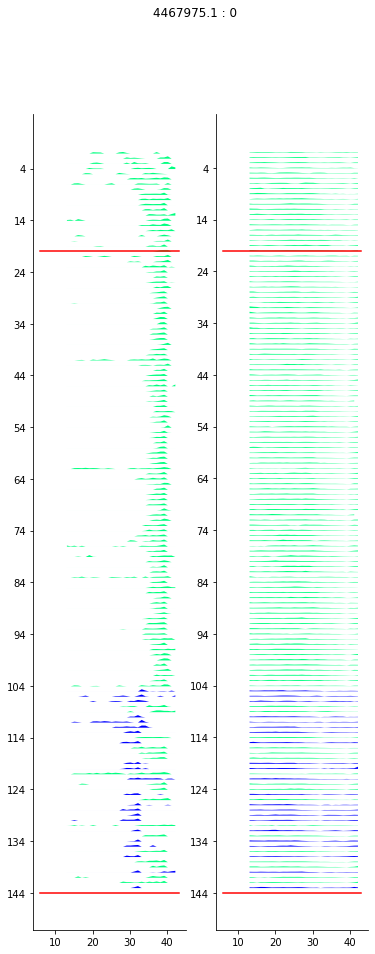

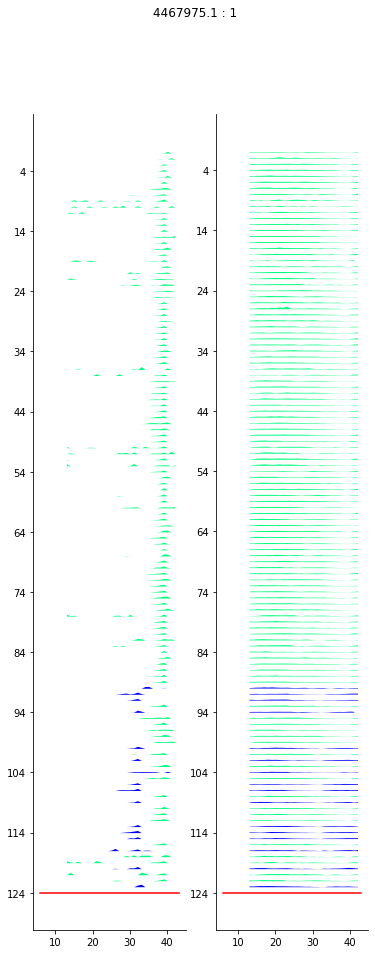

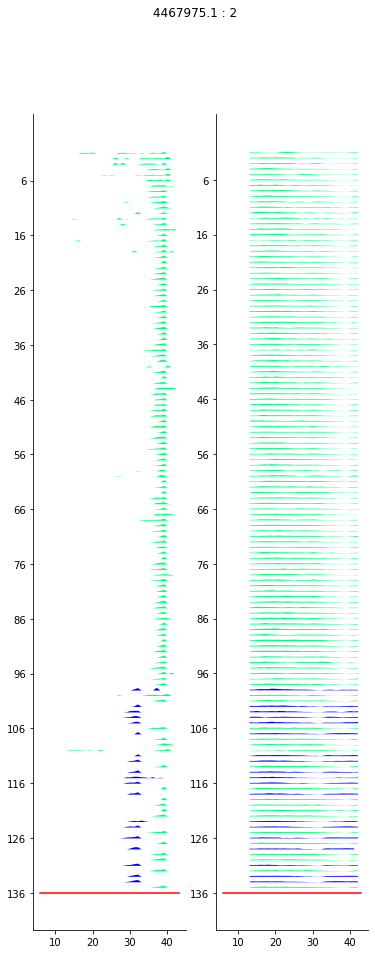

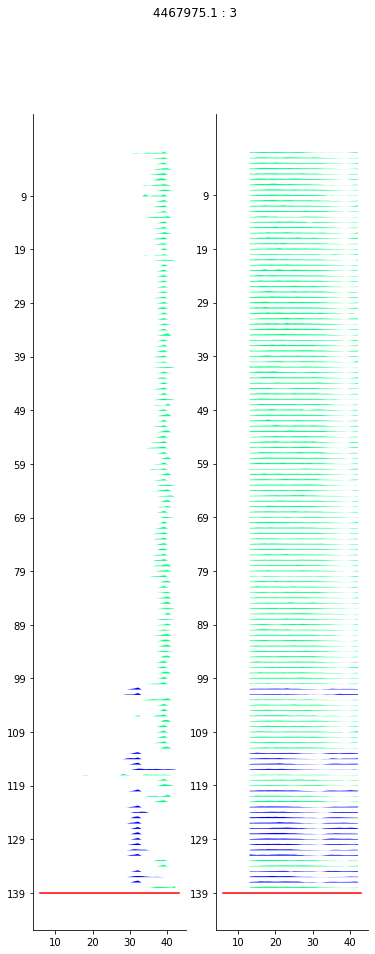

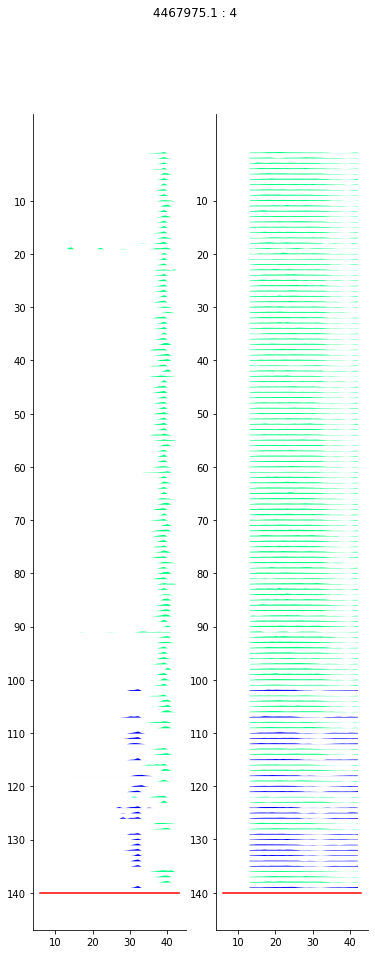

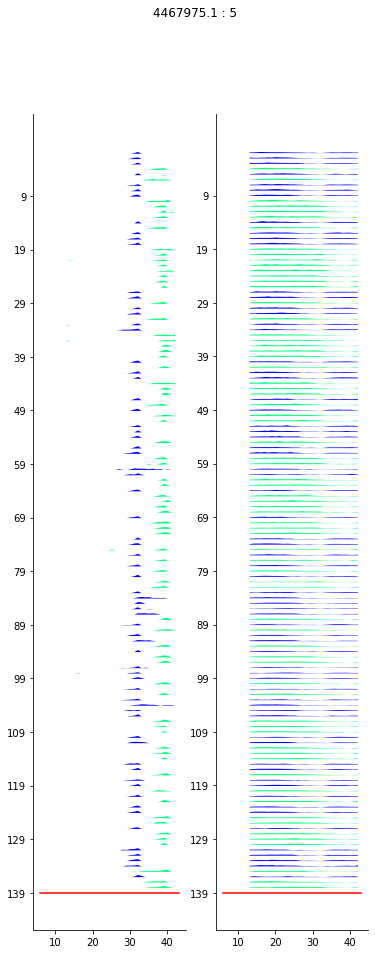

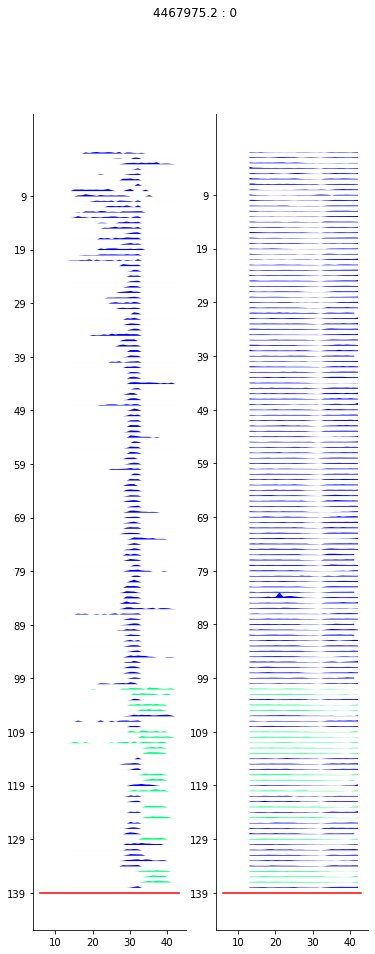

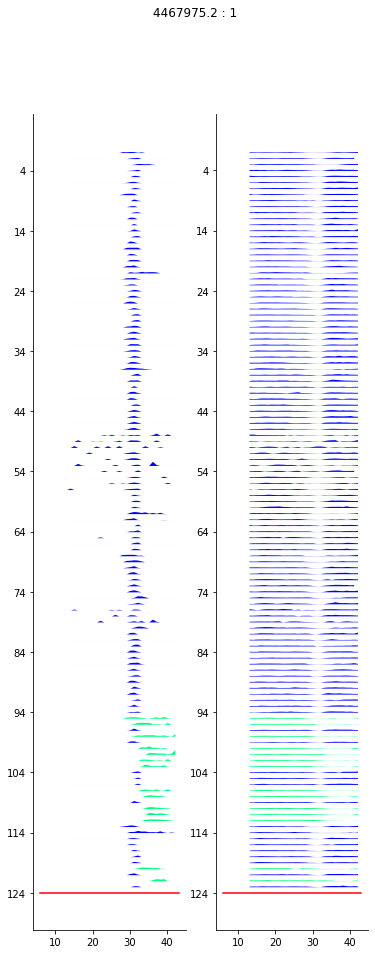

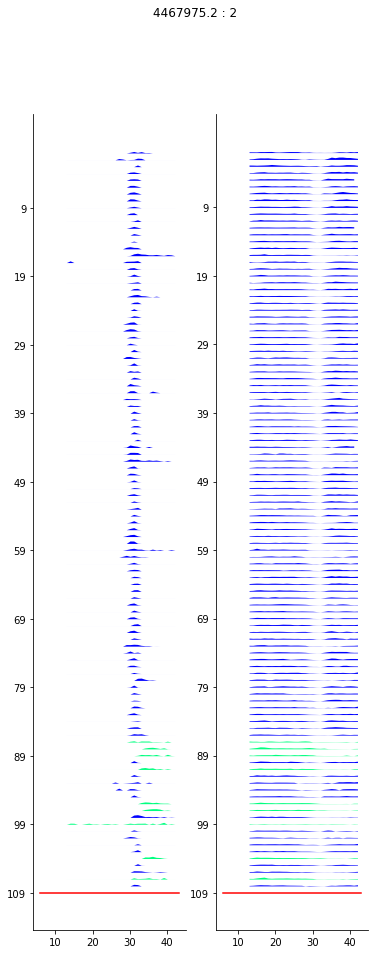

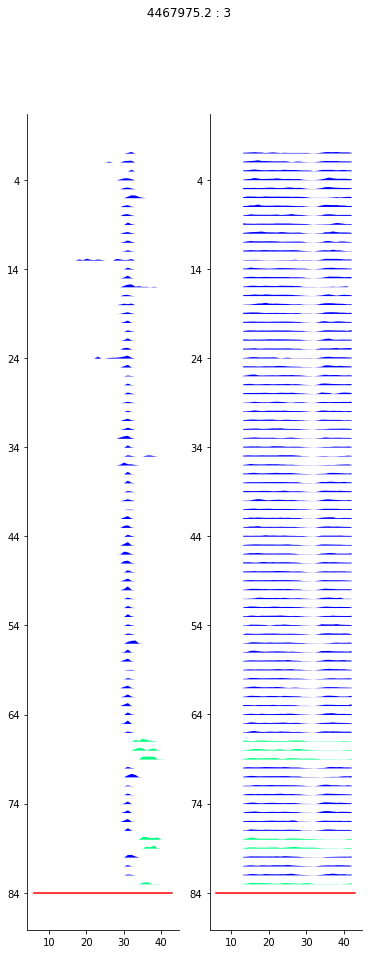

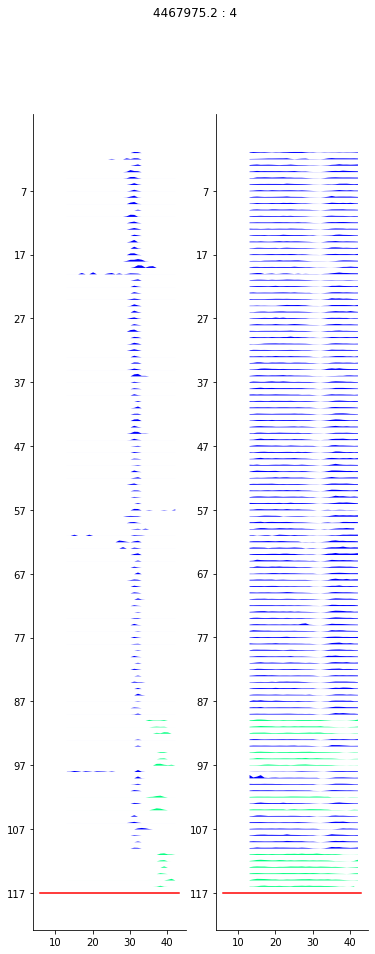

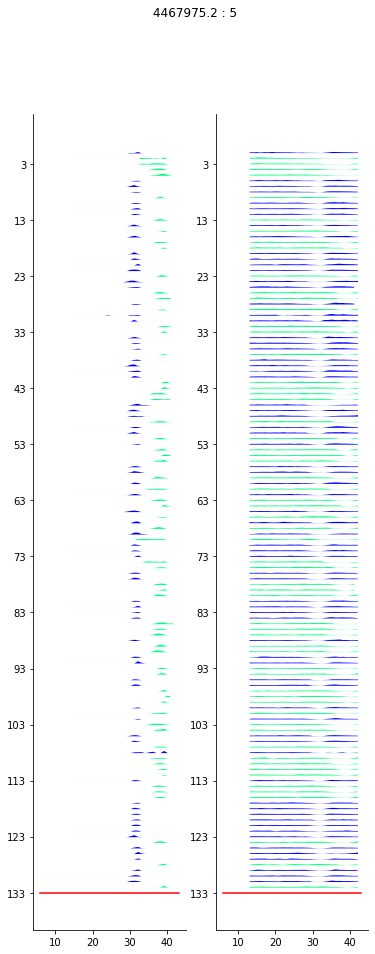

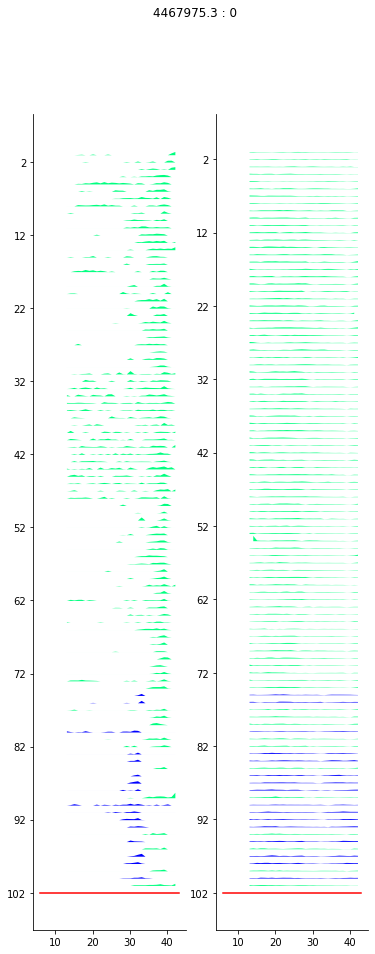

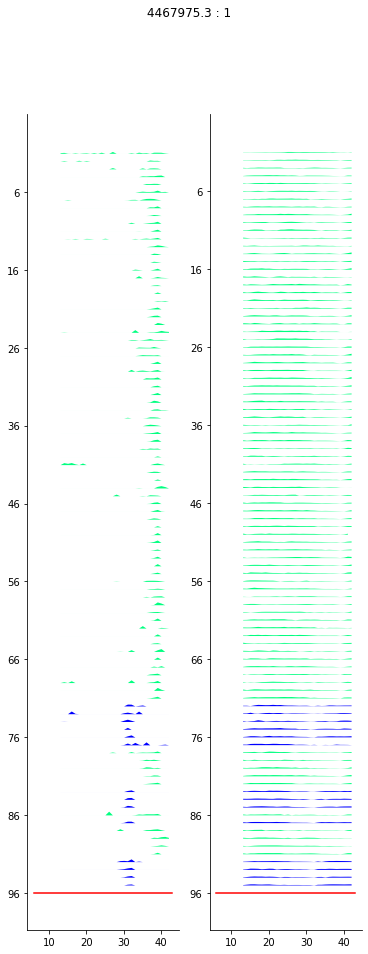

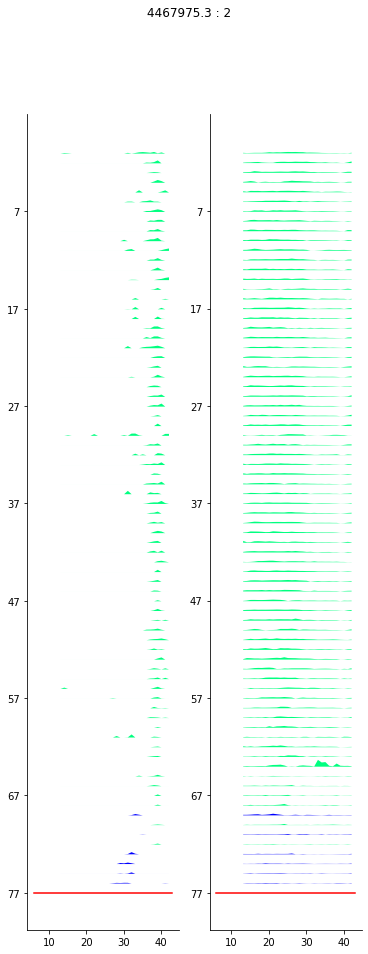

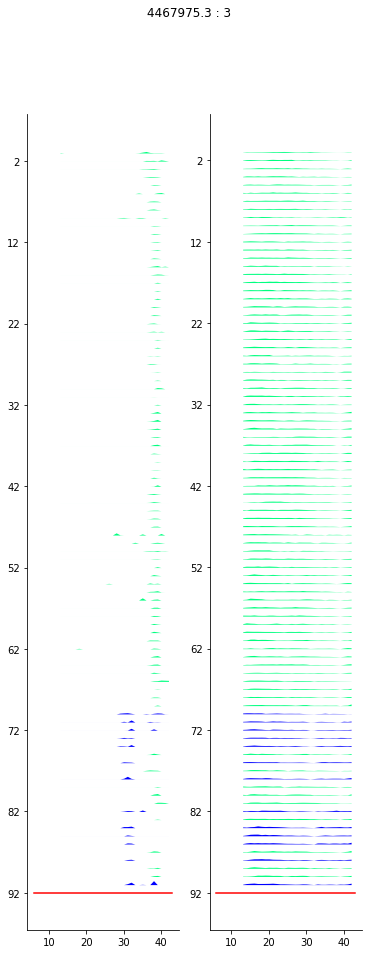

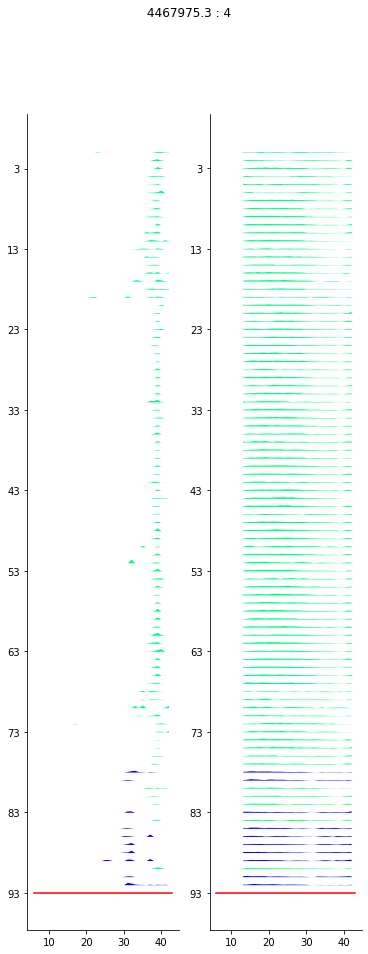

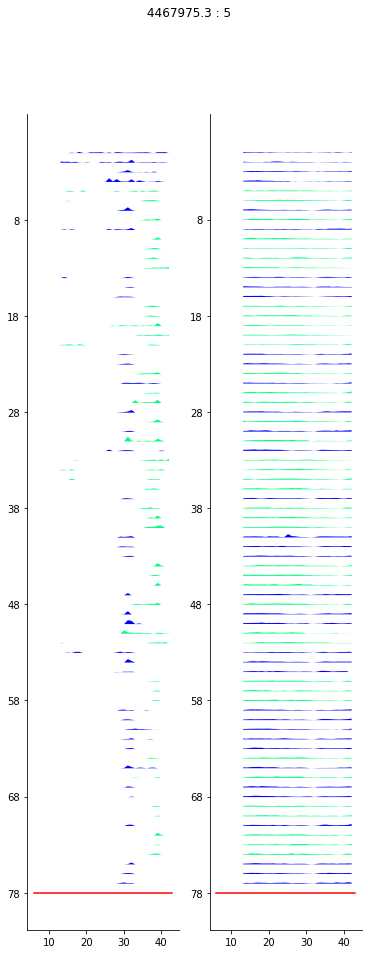

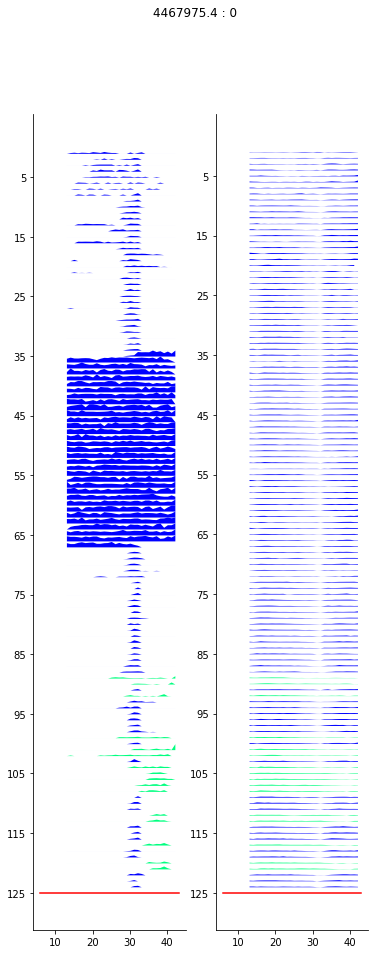

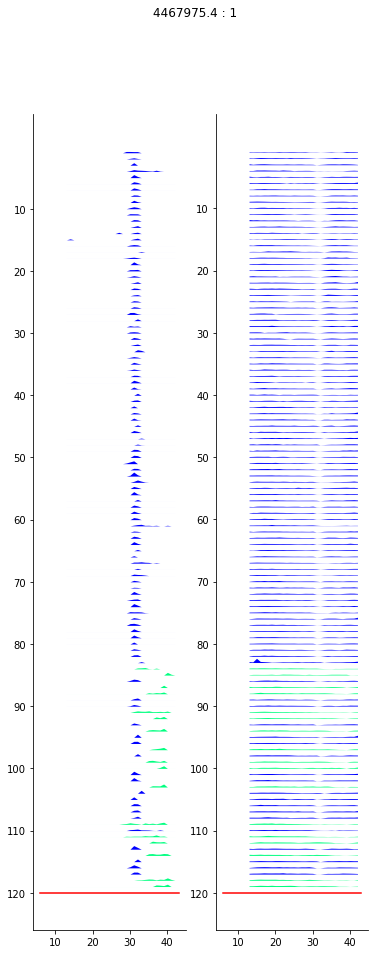

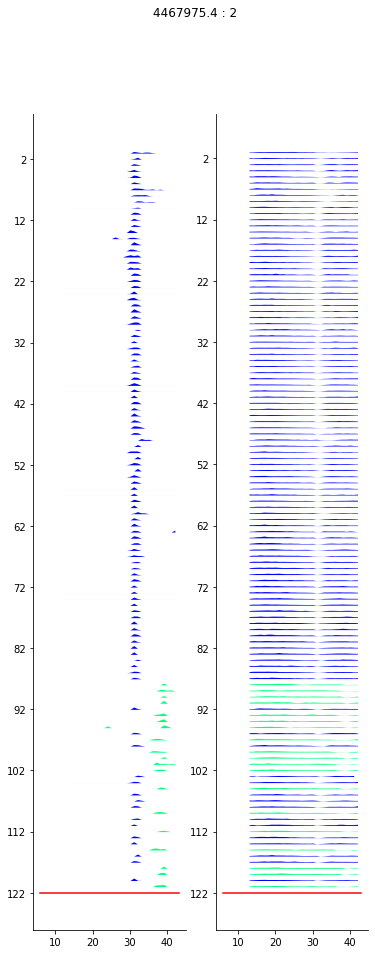

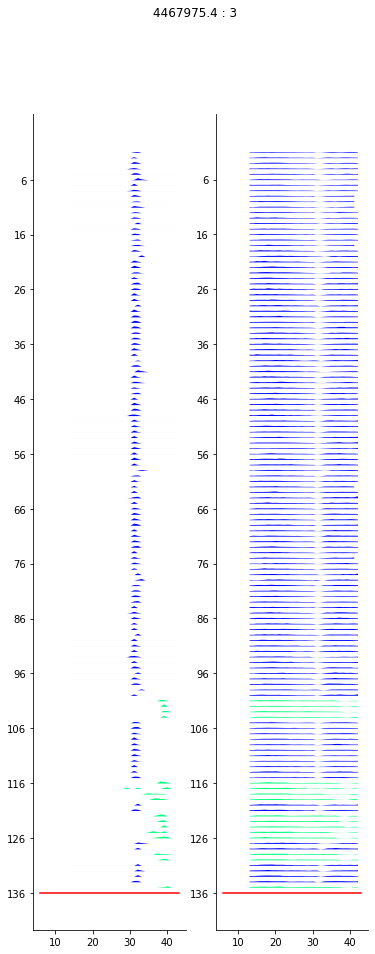

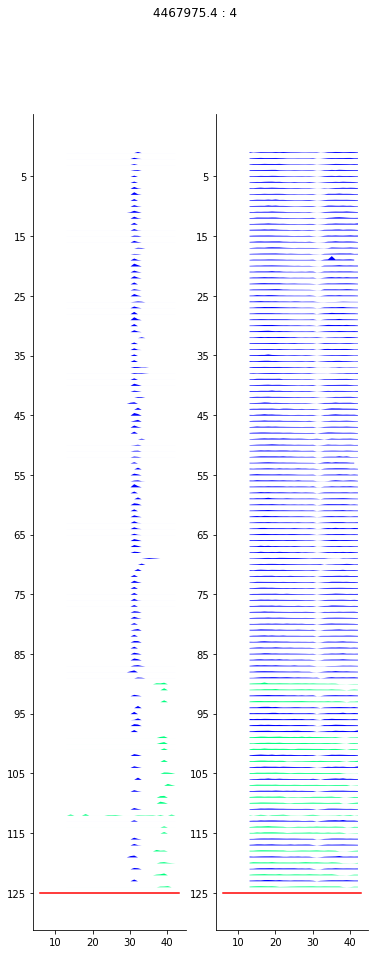

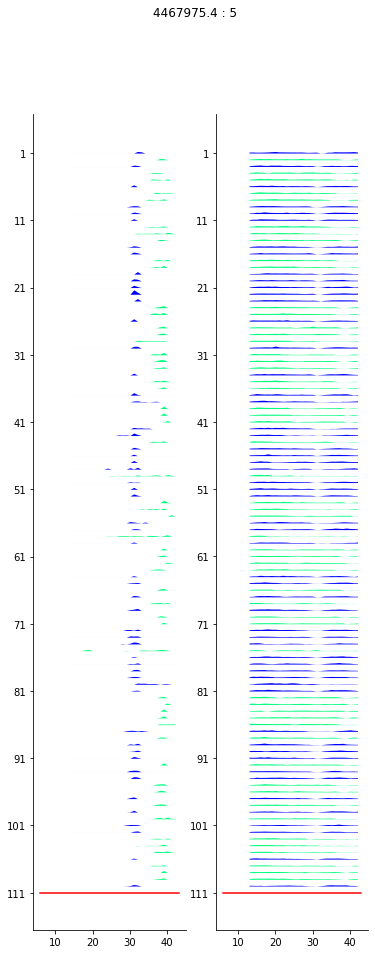

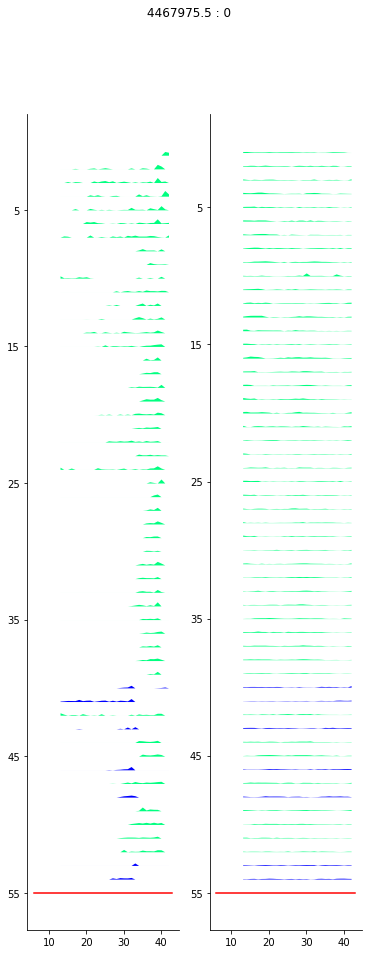

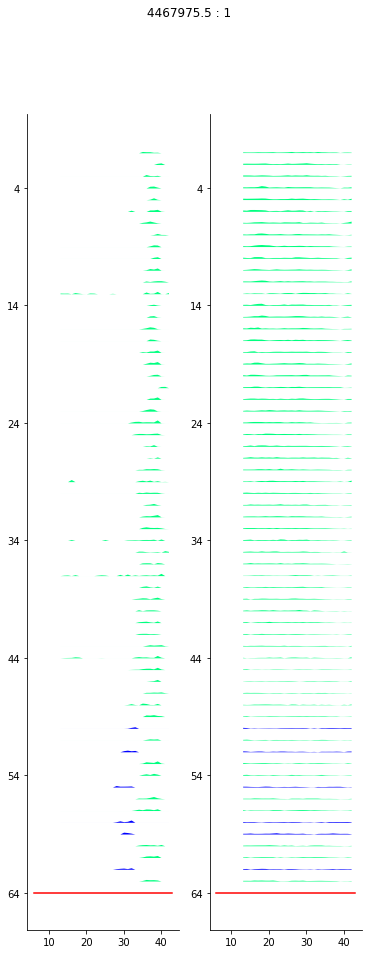

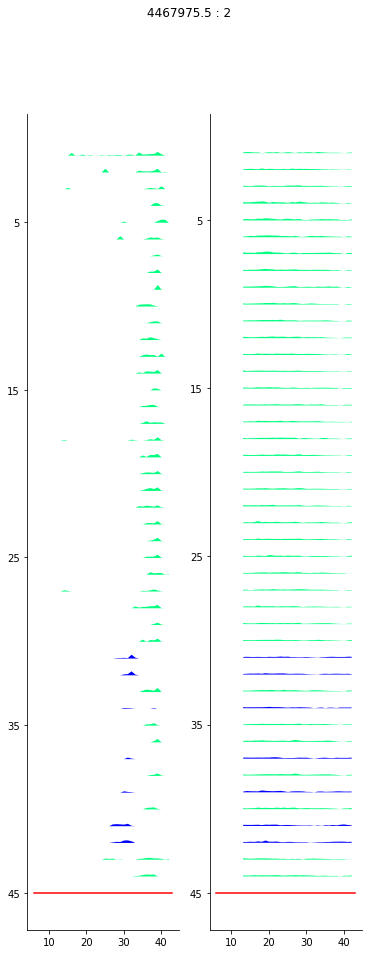

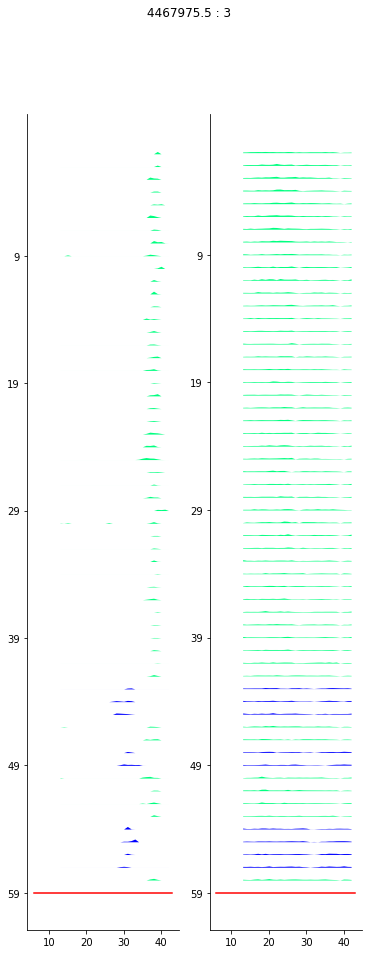

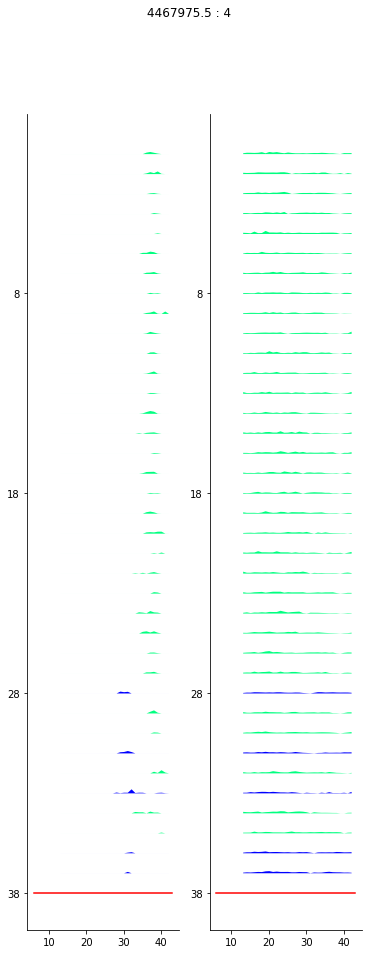

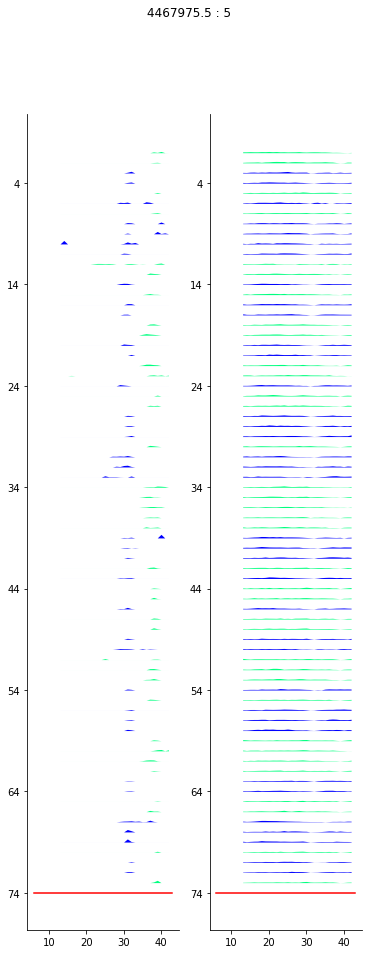

In [113]:
run_groupedsession_plots(KOs)

4467331.1
0 ({'date': '29_11_2020', 'scene': 'YMaze_LNovel', 'session': 1},)


/home/mplitt/repos/TwoPUtils/sess.py:93: UserWarning: skipping checking keys, remaining initialization not guaranteed to work
  warnings.warn("skipping checking keys, remaining initialization not guaranteed to work")


1 ({'date': '30_11_2020', 'scene': 'YMaze_LNovel', 'session': 1},)


/home/mplitt/repos/TwoPUtils/sess.py:93: UserWarning: skipping checking keys, remaining initialization not guaranteed to work
  warnings.warn("skipping checking keys, remaining initialization not guaranteed to work")


2 ({'date': '01_12_2020', 'scene': 'YMaze_LNovel', 'session': 1},)


/home/mplitt/repos/TwoPUtils/sess.py:93: UserWarning: skipping checking keys, remaining initialization not guaranteed to work
  warnings.warn("skipping checking keys, remaining initialization not guaranteed to work")


3 ({'date': '02_12_2020', 'scene': 'YMaze_LNovel', 'session': 1},)


/home/mplitt/repos/TwoPUtils/sess.py:93: UserWarning: skipping checking keys, remaining initialization not guaranteed to work
  warnings.warn("skipping checking keys, remaining initialization not guaranteed to work")


4 ({'date': '03_12_2020', 'scene': 'YMaze_LNovel', 'session': 1},)


/home/mplitt/repos/TwoPUtils/sess.py:93: UserWarning: skipping checking keys, remaining initialization not guaranteed to work
  warnings.warn("skipping checking keys, remaining initialization not guaranteed to work")


5 ({'date': '04_12_2020', 'scene': 'YMaze_LNovel', 'session': 1},)


/home/mplitt/repos/TwoPUtils/sess.py:93: UserWarning: skipping checking keys, remaining initialization not guaranteed to work
  warnings.warn("skipping checking keys, remaining initialization not guaranteed to work")


4467331.2
0 ({'date': '29_11_2020', 'scene': 'YMaze_LNovel', 'session': 1},)


/home/mplitt/repos/TwoPUtils/sess.py:93: UserWarning: skipping checking keys, remaining initialization not guaranteed to work
  warnings.warn("skipping checking keys, remaining initialization not guaranteed to work")


1 ({'date': '30_11_2020', 'scene': 'YMaze_LNovel', 'session': 1},)


/home/mplitt/repos/TwoPUtils/sess.py:93: UserWarning: skipping checking keys, remaining initialization not guaranteed to work
  warnings.warn("skipping checking keys, remaining initialization not guaranteed to work")


2 ({'date': '01_12_2020', 'scene': 'YMaze_LNovel', 'session': 1},)


/home/mplitt/repos/TwoPUtils/sess.py:93: UserWarning: skipping checking keys, remaining initialization not guaranteed to work
  warnings.warn("skipping checking keys, remaining initialization not guaranteed to work")


3 ({'date': '02_12_2020', 'scene': 'YMaze_LNovel', 'session': 1}, {'date': '02_12_2020', 'scene': 'YMaze_LNovel', 'session': 2})


/home/mplitt/repos/TwoPUtils/sess.py:93: UserWarning: skipping checking keys, remaining initialization not guaranteed to work
  warnings.warn("skipping checking keys, remaining initialization not guaranteed to work")
/home/mplitt/repos/TwoPUtils/sess.py:93: UserWarning: skipping checking keys, remaining initialization not guaranteed to work
  warnings.warn("skipping checking keys, remaining initialization not guaranteed to work")


4 ({'date': '03_12_2020', 'scene': 'YMaze_LNovel', 'session': 1},)


/home/mplitt/repos/TwoPUtils/sess.py:93: UserWarning: skipping checking keys, remaining initialization not guaranteed to work
  warnings.warn("skipping checking keys, remaining initialization not guaranteed to work")


5 ({'date': '04_12_2020', 'scene': 'YMaze_LNovel', 'session': 1},)


/home/mplitt/repos/TwoPUtils/sess.py:93: UserWarning: skipping checking keys, remaining initialization not guaranteed to work
  warnings.warn("skipping checking keys, remaining initialization not guaranteed to work")


4467332.1
0 ({'date': '29_11_2020', 'scene': 'YMaze_LNovel', 'session': 1},)


/home/mplitt/repos/TwoPUtils/sess.py:93: UserWarning: skipping checking keys, remaining initialization not guaranteed to work
  warnings.warn("skipping checking keys, remaining initialization not guaranteed to work")


1 ({'date': '30_11_2020', 'scene': 'YMaze_LNovel', 'session': 1},)


/home/mplitt/repos/TwoPUtils/sess.py:93: UserWarning: skipping checking keys, remaining initialization not guaranteed to work
  warnings.warn("skipping checking keys, remaining initialization not guaranteed to work")


2 ({'date': '01_12_2020', 'scene': 'YMaze_LNovel', 'session': 1},)


/home/mplitt/repos/TwoPUtils/sess.py:93: UserWarning: skipping checking keys, remaining initialization not guaranteed to work
  warnings.warn("skipping checking keys, remaining initialization not guaranteed to work")


3 ({'date': '02_12_2020', 'scene': 'YMaze_LNovel', 'session': 1},)


/home/mplitt/repos/TwoPUtils/sess.py:93: UserWarning: skipping checking keys, remaining initialization not guaranteed to work
  warnings.warn("skipping checking keys, remaining initialization not guaranteed to work")


4 ({'date': '03_12_2020', 'scene': 'YMaze_LNovel', 'session': 1},)


/home/mplitt/repos/TwoPUtils/sess.py:93: UserWarning: skipping checking keys, remaining initialization not guaranteed to work
  warnings.warn("skipping checking keys, remaining initialization not guaranteed to work")


5 ({'date': '04_12_2020', 'scene': 'YMaze_LNovel', 'session': 1},)


/home/mplitt/repos/TwoPUtils/sess.py:93: UserWarning: skipping checking keys, remaining initialization not guaranteed to work
  warnings.warn("skipping checking keys, remaining initialization not guaranteed to work")


4467332.2
0 ({'date': '29_11_2020', 'scene': 'YMaze_LNovel', 'session': 1}, {'date': '29_11_2020', 'scene': 'YMaze_LNovel', 'session': 2})


/home/mplitt/repos/TwoPUtils/sess.py:93: UserWarning: skipping checking keys, remaining initialization not guaranteed to work
  warnings.warn("skipping checking keys, remaining initialization not guaranteed to work")
/home/mplitt/repos/TwoPUtils/sess.py:93: UserWarning: skipping checking keys, remaining initialization not guaranteed to work
  warnings.warn("skipping checking keys, remaining initialization not guaranteed to work")


1 ({'date': '30_11_2020', 'scene': 'YMaze_LNovel', 'session': 1}, {'date': '30_11_2020', 'scene': 'YMaze_LNovel', 'session': 3})


/home/mplitt/repos/TwoPUtils/sess.py:93: UserWarning: skipping checking keys, remaining initialization not guaranteed to work
  warnings.warn("skipping checking keys, remaining initialization not guaranteed to work")
/home/mplitt/repos/TwoPUtils/sess.py:93: UserWarning: skipping checking keys, remaining initialization not guaranteed to work
  warnings.warn("skipping checking keys, remaining initialization not guaranteed to work")


2 ({'date': '01_12_2020', 'scene': 'YMaze_LNovel', 'session': 1},)


/home/mplitt/repos/TwoPUtils/sess.py:93: UserWarning: skipping checking keys, remaining initialization not guaranteed to work
  warnings.warn("skipping checking keys, remaining initialization not guaranteed to work")
/home/mplitt/anaconda3/envs/STX3/lib/python3.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/mplitt/repos/TwoPUtils/sess.py:93: UserWarning: skipping checking keys, remaining initialization not guaranteed to work
  warnings.warn("skipping checking keys, remaining initialization not guaranteed to work")


3 ({'date': '02_12_2020', 'scene': 'YMaze_LNovel', 'session': 1},)
4 ({'date': '03_12_2020', 'scene': 'YMaze_LNovel', 'session': 1},)


/home/mplitt/repos/TwoPUtils/sess.py:93: UserWarning: skipping checking keys, remaining initialization not guaranteed to work
  warnings.warn("skipping checking keys, remaining initialization not guaranteed to work")


5 ({'date': '04_12_2020', 'scene': 'YMaze_LNovel', 'session': 1},)


/home/mplitt/repos/TwoPUtils/sess.py:93: UserWarning: skipping checking keys, remaining initialization not guaranteed to work
  warnings.warn("skipping checking keys, remaining initialization not guaranteed to work")


4467333.1
0 ({'date': '29_11_2020', 'scene': 'YMaze_LNovel', 'session': 1},)


/home/mplitt/repos/TwoPUtils/sess.py:93: UserWarning: skipping checking keys, remaining initialization not guaranteed to work
  warnings.warn("skipping checking keys, remaining initialization not guaranteed to work")


1 ({'date': '30_11_2020', 'scene': 'YMaze_LNovel', 'session': 1},)


/home/mplitt/repos/TwoPUtils/sess.py:93: UserWarning: skipping checking keys, remaining initialization not guaranteed to work
  warnings.warn("skipping checking keys, remaining initialization not guaranteed to work")


2 ({'date': '01_12_2020', 'scene': 'YMaze_LNovel', 'session': 1},)


/home/mplitt/repos/TwoPUtils/sess.py:93: UserWarning: skipping checking keys, remaining initialization not guaranteed to work
  warnings.warn("skipping checking keys, remaining initialization not guaranteed to work")


3 ({'date': '02_12_2020', 'scene': 'YMaze_LNovel', 'session': 1},)


/home/mplitt/repos/TwoPUtils/sess.py:93: UserWarning: skipping checking keys, remaining initialization not guaranteed to work
  warnings.warn("skipping checking keys, remaining initialization not guaranteed to work")


4 ({'date': '03_12_2020', 'scene': 'YMaze_LNovel', 'session': 2},)


/home/mplitt/repos/TwoPUtils/sess.py:93: UserWarning: skipping checking keys, remaining initialization not guaranteed to work
  warnings.warn("skipping checking keys, remaining initialization not guaranteed to work")


5 ({'date': '05_12_2020', 'scene': 'YMaze_LNovel', 'session': 1},)


/home/mplitt/repos/TwoPUtils/sess.py:93: UserWarning: skipping checking keys, remaining initialization not guaranteed to work
  warnings.warn("skipping checking keys, remaining initialization not guaranteed to work")


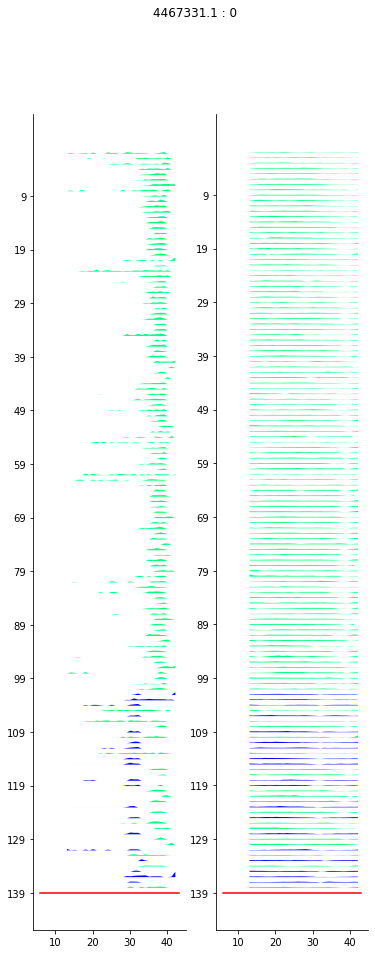

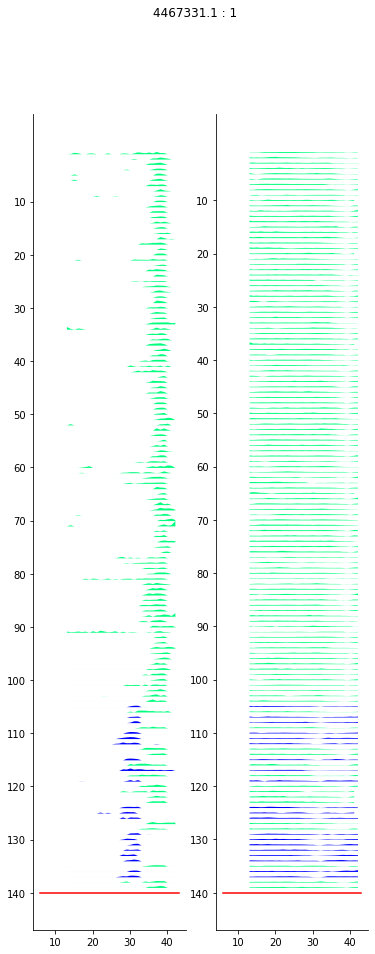

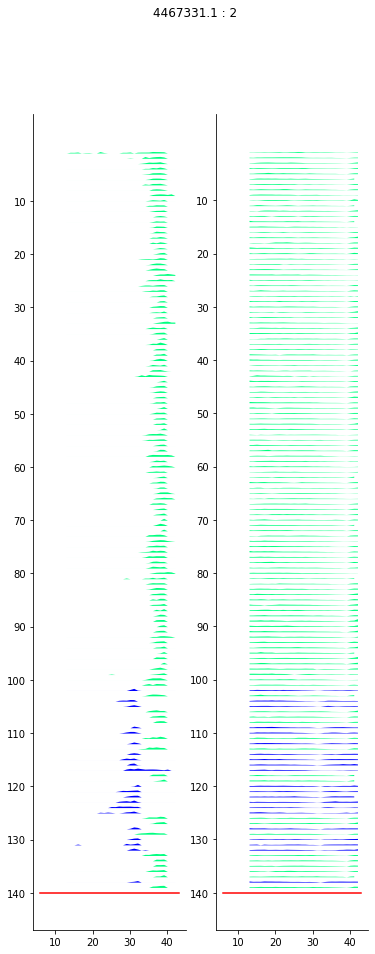

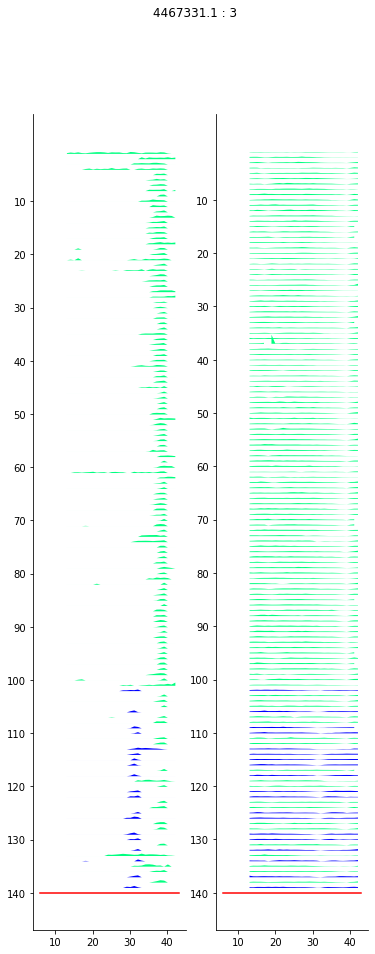

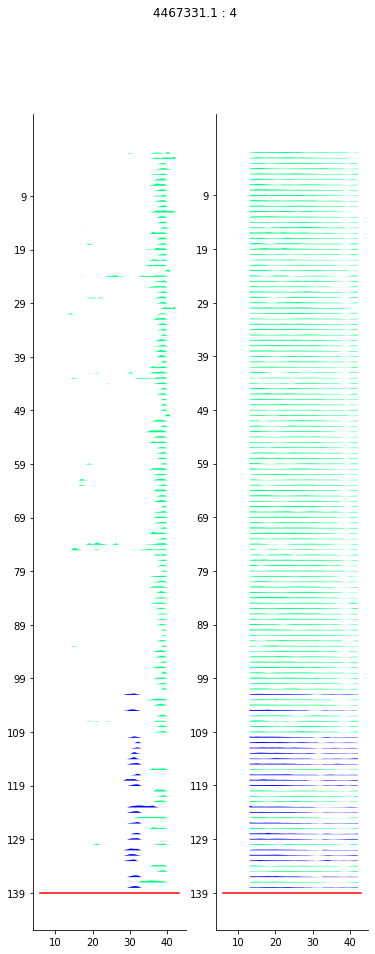

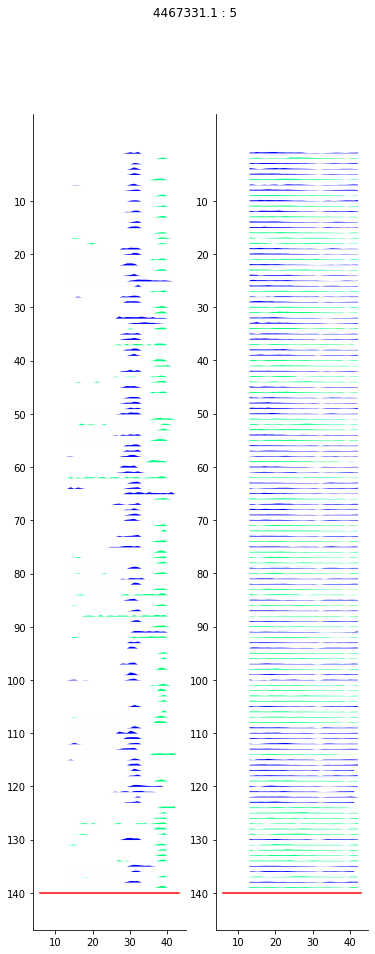

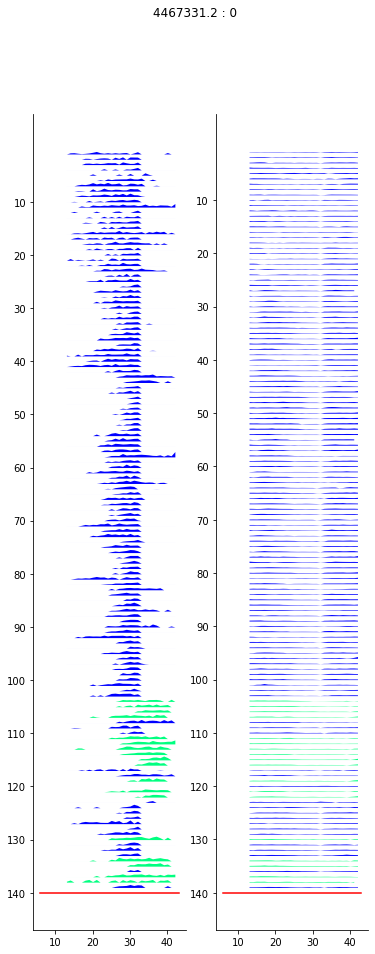

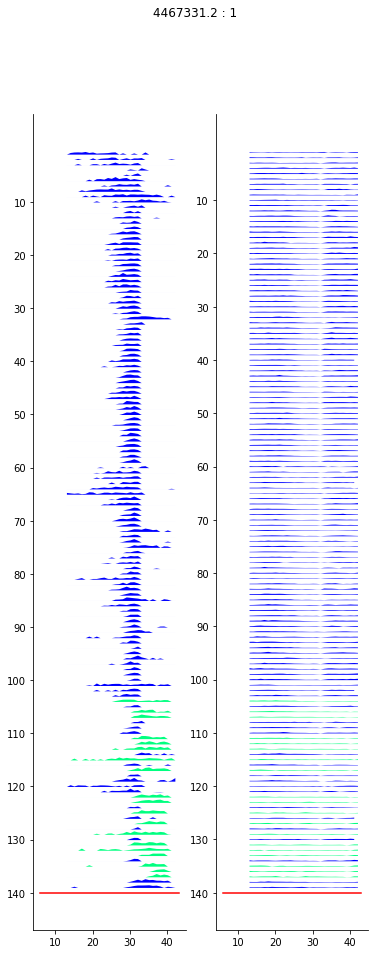

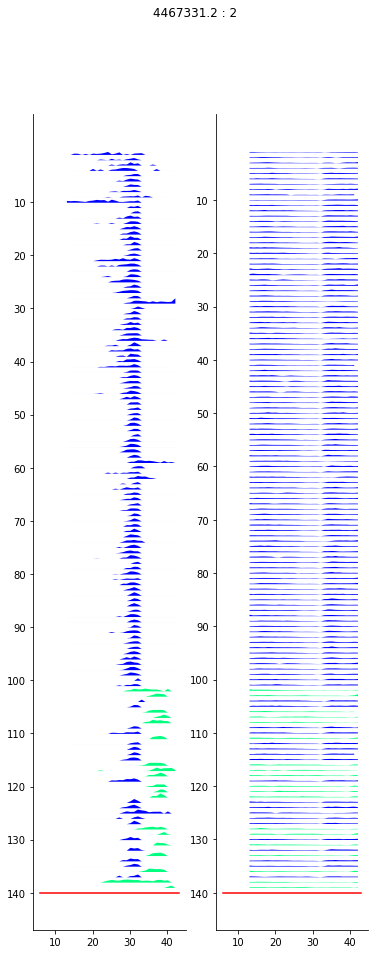

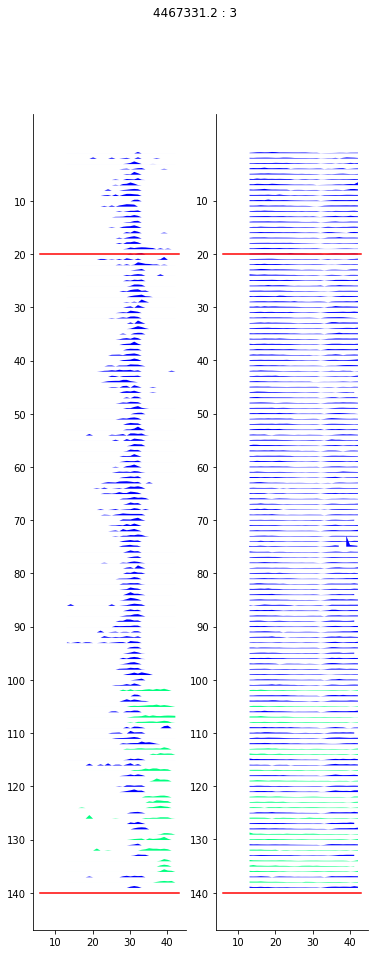

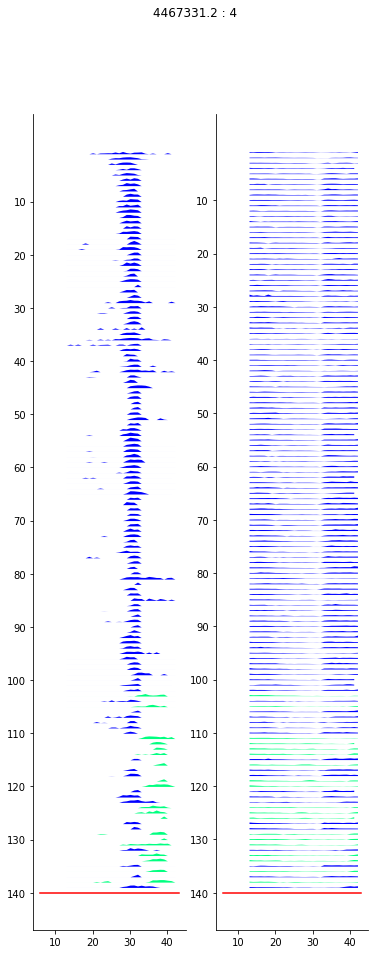

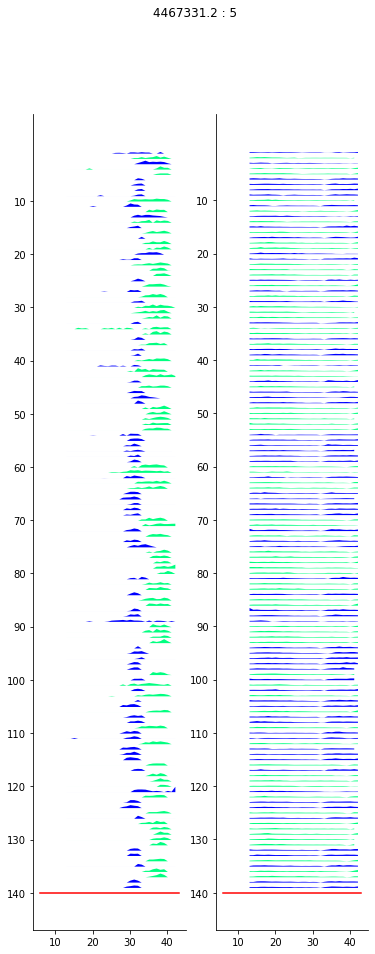

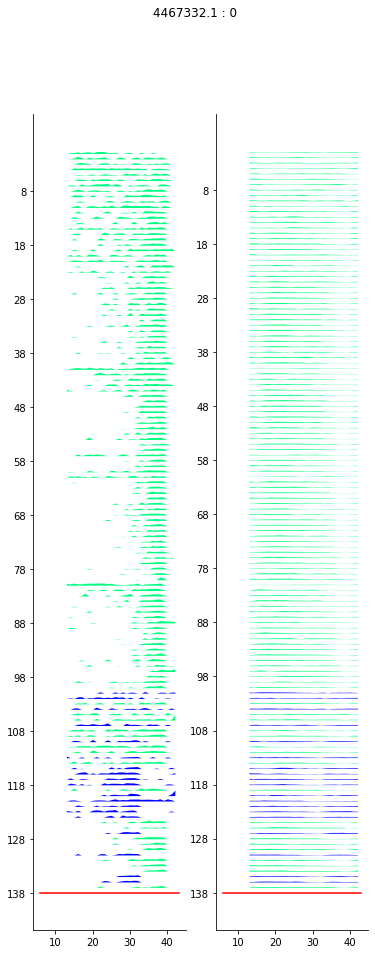

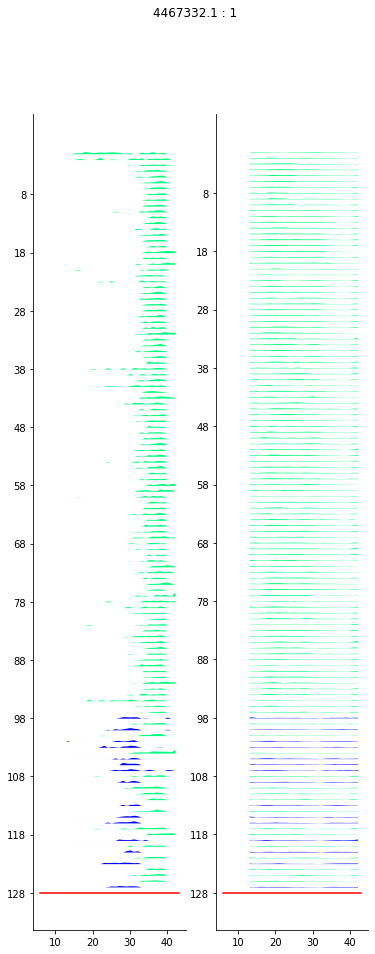

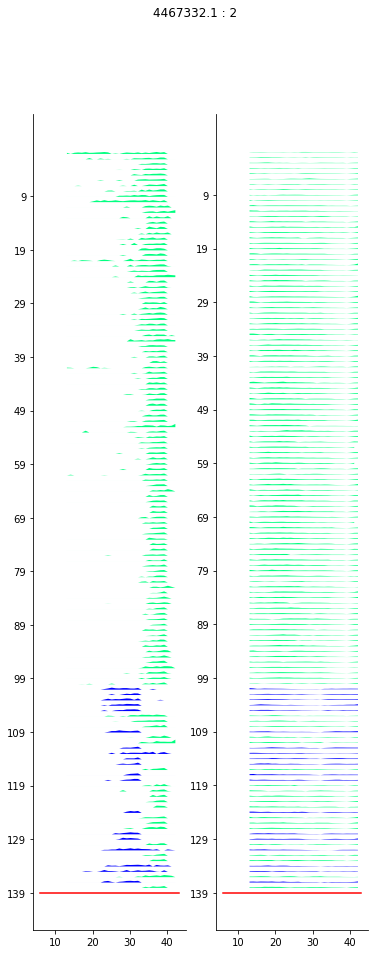

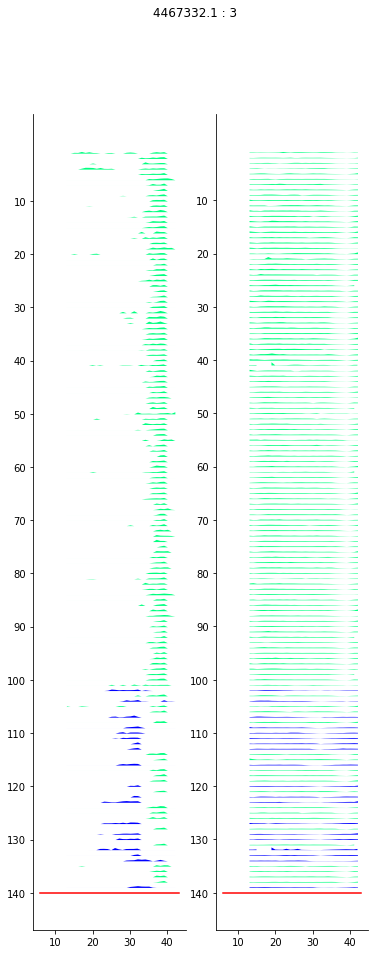

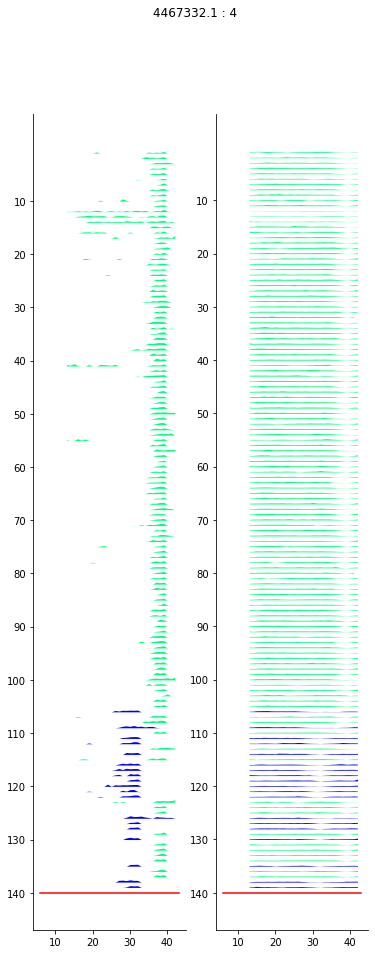

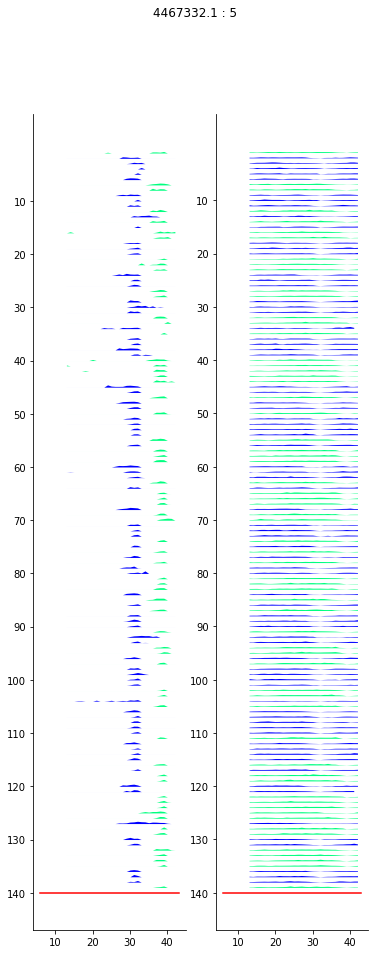

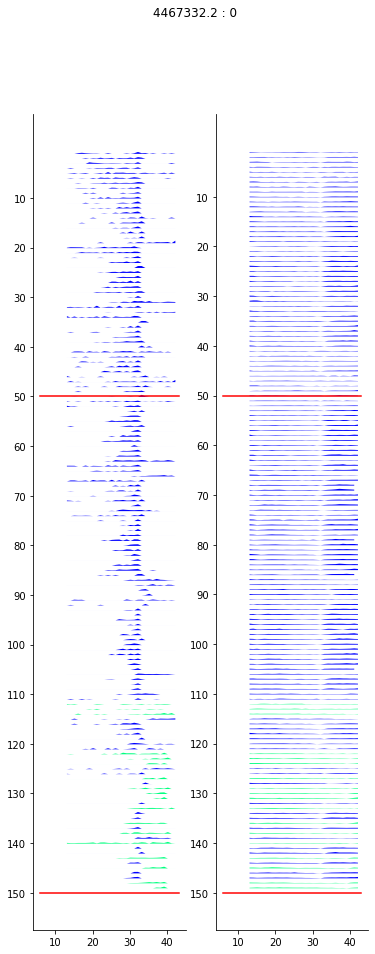

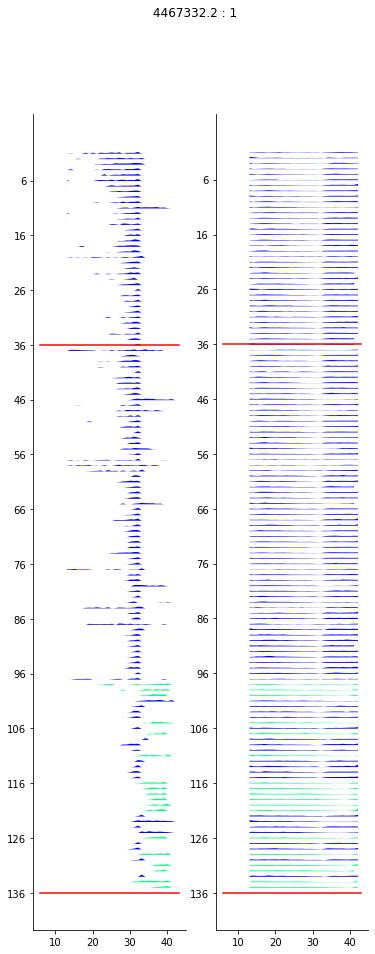

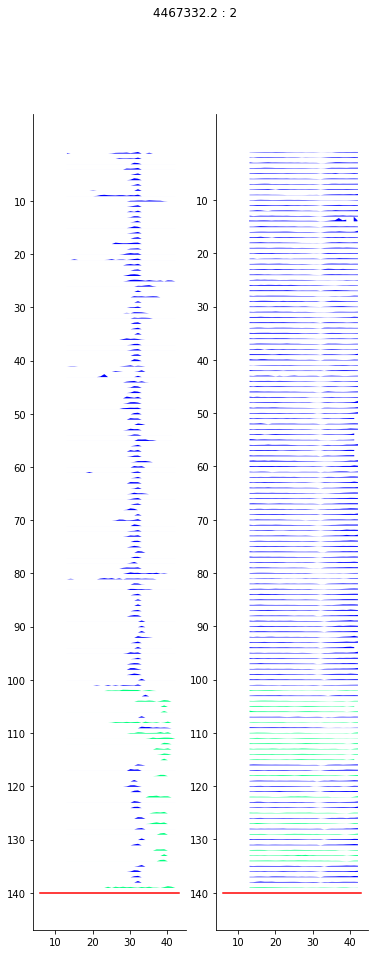

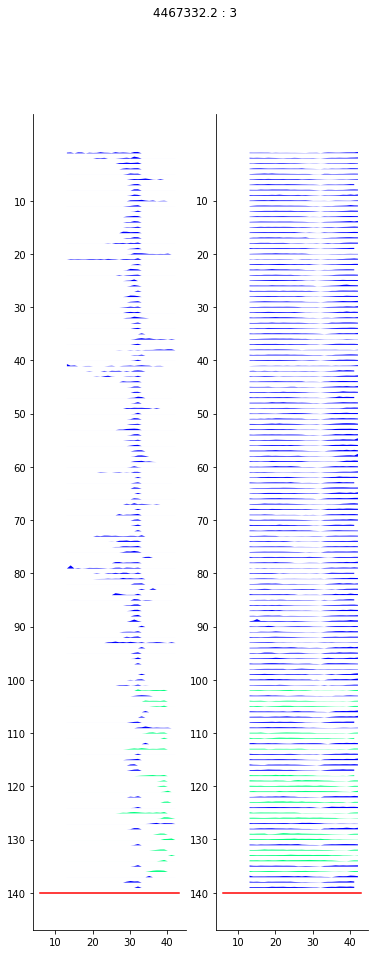

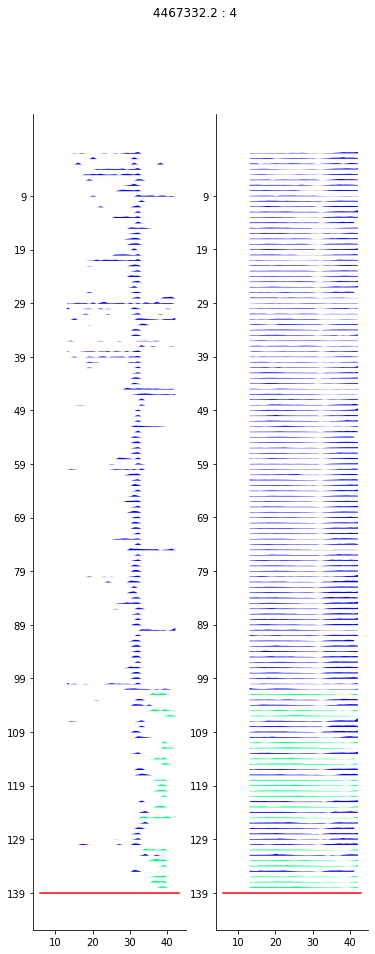

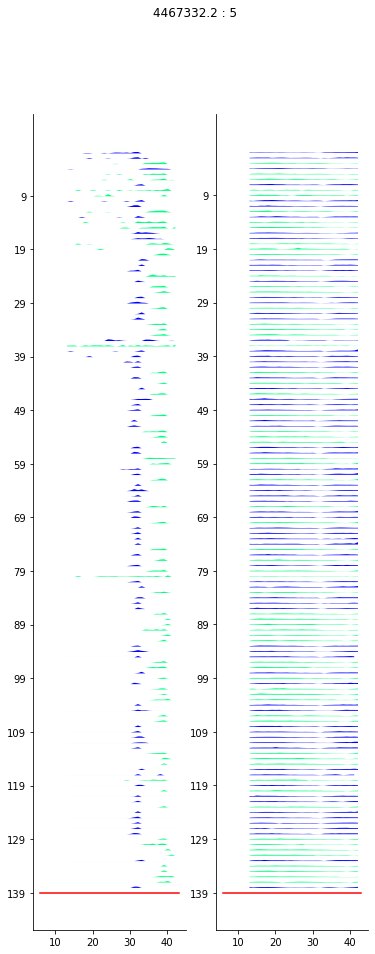

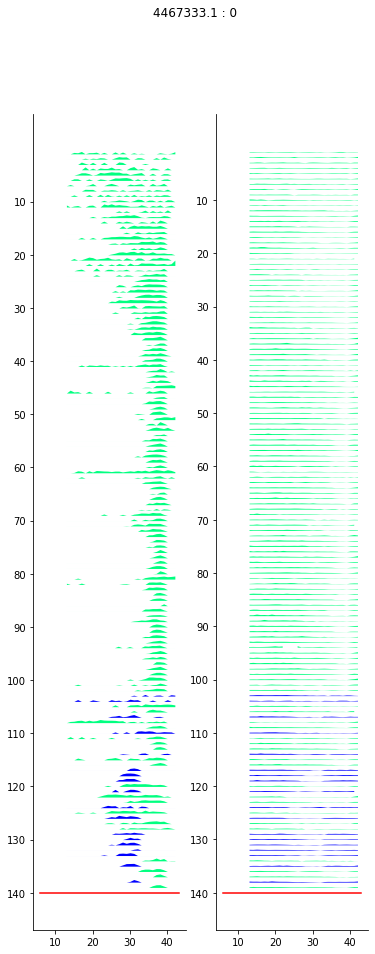

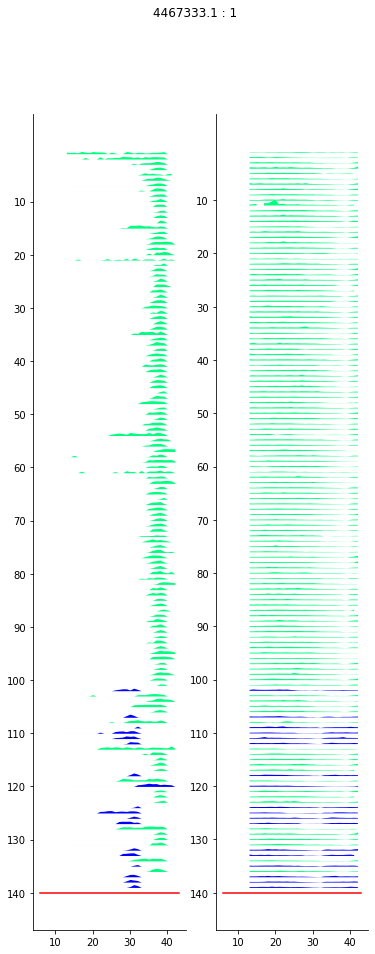

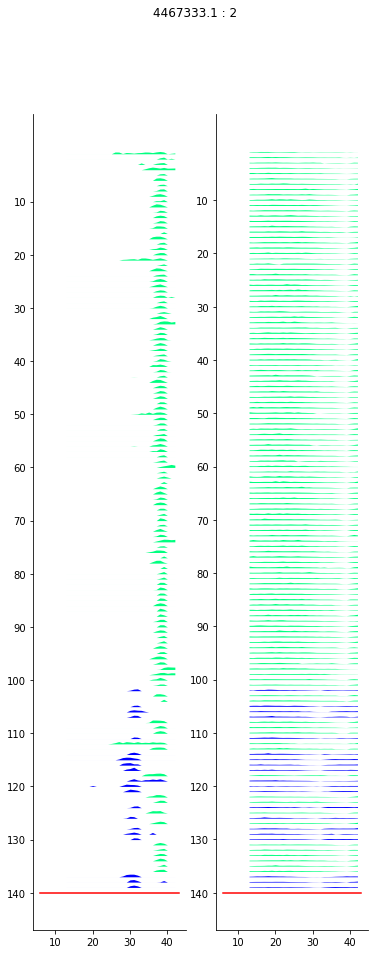

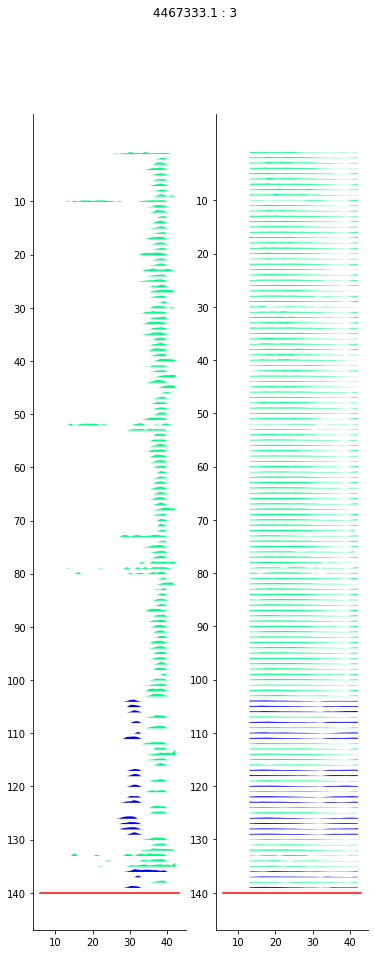

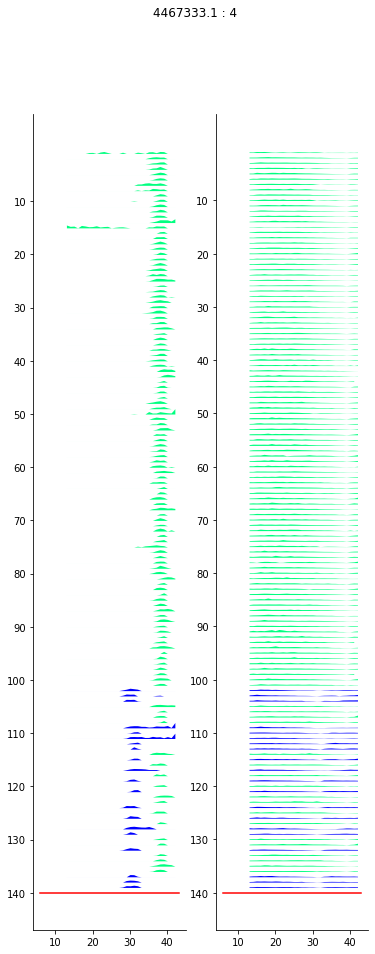

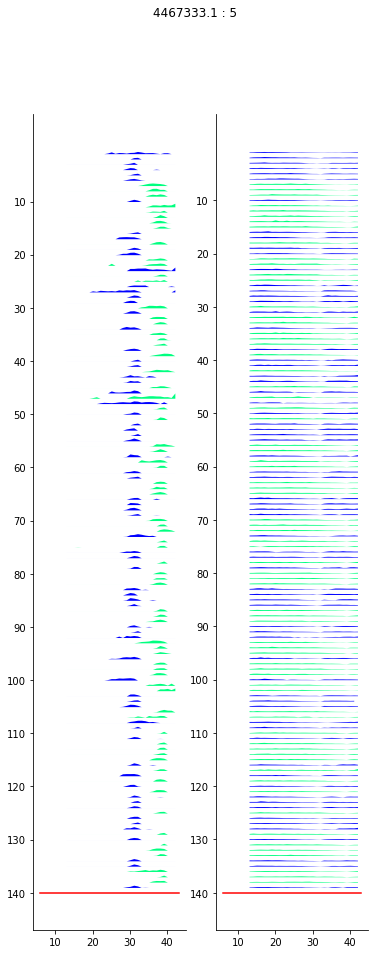

In [114]:
run_groupedsession_plots(CTRLs)

In [105]:
KOs_reversals = {'4467975.1': (({'date': '04_10_2020', 'scene':'YMaze_LNovel','session':1}, {'date':'04_10_2020','scene':'YMaze_RewardReversal', 'session':2}), ##########################
                     ({'date': '05_10_2020', 'scene':'YMaze_RewardReversal','session':1},),
                     ({'date': '06_10_2020', 'scene':'YMaze_RewardReversal','session':1}, {'date':'06_10_2020','scene':'YMaze_LNovel', 'session':1})),
       '4467975.2': (({'date': '04_10_2020', 'scene':'YMaze_LNovel','session':1}, {'date':'04_10_2020','scene':'YMaze_RewardReversal', 'session':1}), ##########################
                     ({'date': '05_10_2020', 'scene':'YMaze_RewardReversal','session':1},),
                     ({'date': '06_10_2020', 'scene':'YMaze_RewardReversal','session':1}, {'date':'06_10_2020','scene':'YMaze_LNovel', 'session':1})),
       '4467975.3': (({'date': '04_10_2020', 'scene':'YMaze_LNovel','session':1}, {'date':'04_10_2020','scene':'YMaze_RewardReversal', 'session':1}), ##########################
                     ({'date': '05_10_2020', 'scene':'YMaze_RewardReversal','session':1},),
                     ({'date': '06_10_2020', 'scene':'YMaze_RewardReversal','session':1}, {'date':'06_10_2020','scene':'YMaze_LNovel', 'session':1})),
       '4467975.4': (({'date': '04_10_2020', 'scene':'YMaze_LNovel','session':1}, {'date':'04_10_2020','scene':'YMaze_RewardReversal', 'session':1}), ##########################
                     ({'date': '05_10_2020', 'scene':'YMaze_RewardReversal','session':1},),
                     ({'date': '06_10_2020', 'scene':'YMaze_RewardReversal','session':1}, {'date':'06_10_2020','scene':'YMaze_LNovel', 'session':1})),
       '4467975.5': (({'date': '04_10_2020', 'scene':'YMaze_LNovel','session':1}, {'date':'04_10_2020','scene':'YMaze_RewardReversal', 'session':1}), ##########################
                     ({'date': '05_10_2020', 'scene':'YMaze_RewardReversal','session':1},),
                     ({'date': '06_10_2020', 'scene':'YMaze_RewardReversal','session':1}, {'date':'06_10_2020','scene':'YMaze_LNovel', 'session':1}))}


CTRLs_reversals = {'4467331.1': (({'date': '05_12_2020', 'scene':'YMaze_LNovel','session':1}, {'date':'05_12_2020','scene':'YMaze_RewardReversal', 'session':1}), ##########################
                     ({'date': '06_12_2020', 'scene':'YMaze_RewardReversal','session':2},),
                     ({'date': '07_12_2020', 'scene':'YMaze_RewardReversal','session':1}, {'date':'07_12_2020','scene':'YMaze_LNovel', 'session':1})),
       '4467331.2': (({'date': '05_12_2020', 'scene':'YMaze_LNovel','session':1}, {'date':'05_12_2020','scene':'YMaze_RewardReversal', 'session':1}), ##########################
                     ({'date': '06_12_2020', 'scene':'YMaze_RewardReversal','session':1},),
                     ({'date': '07_12_2020', 'scene':'YMaze_RewardReversal','session':1}, {'date':'07_12_2020','scene':'YMaze_LNovel', 'session':1})),
       '4467332.1': (({'date': '05_12_2020', 'scene':'YMaze_LNovel','session':1}, {'date':'05_12_2020','scene':'YMaze_RewardReversal', 'session':1}), ##########################
                     ({'date': '06_12_2020', 'scene':'YMaze_RewardReversal','session':1},),
                     ({'date': '07_12_2020', 'scene':'YMaze_RewardReversal','session':1}, {'date':'07_12_2020','scene':'YMaze_LNovel', 'session':1})),
       '4467332.2': (({'date': '06_12_2020', 'scene':'YMaze_LNovel','session':1}, {'date':'06_12_2020','scene':'YMaze_RewardReversal', 'session':1}), ##########################
                     ({'date': '06_12_2020', 'scene':'YMaze_RewardReversal','session':2},),
                     ({'date': '07_12_2020', 'scene':'YMaze_RewardReversal','session':1}, {'date':'07_12_2020','scene':'YMaze_LNovel', 'session':1})),
       '4467333.1': (({'date': '06_12_2020', 'scene':'YMaze_LNovel','session':1}, {'date':'06_12_2020','scene':'YMaze_RewardReversal', 'session':1}), ##########################
                     ({'date': '07_12_2020', 'scene':'YMaze_RewardReversal','session':1},),
                     ({'date': '08_12_2020', 'scene':'YMaze_RewardReversal','session':1}, {'date':'08_12_2020','scene':'YMaze_LNovel', 'session':1}))}

4467975.1
0 ({'date': '04_10_2020', 'scene': 'YMaze_LNovel', 'session': 1}, {'date': '04_10_2020', 'scene': 'YMaze_RewardReversal', 'session': 2})


/home/mplitt/repos/TwoPUtils/sess.py:93: UserWarning: skipping checking keys, remaining initialization not guaranteed to work
  warnings.warn("skipping checking keys, remaining initialization not guaranteed to work")
/home/mplitt/repos/TwoPUtils/sess.py:93: UserWarning: skipping checking keys, remaining initialization not guaranteed to work
  warnings.warn("skipping checking keys, remaining initialization not guaranteed to work")


1 ({'date': '05_10_2020', 'scene': 'YMaze_RewardReversal', 'session': 1},)


/home/mplitt/repos/TwoPUtils/sess.py:93: UserWarning: skipping checking keys, remaining initialization not guaranteed to work
  warnings.warn("skipping checking keys, remaining initialization not guaranteed to work")


2 ({'date': '06_10_2020', 'scene': 'YMaze_RewardReversal', 'session': 1}, {'date': '06_10_2020', 'scene': 'YMaze_LNovel', 'session': 1})


/home/mplitt/repos/TwoPUtils/sess.py:93: UserWarning: skipping checking keys, remaining initialization not guaranteed to work
  warnings.warn("skipping checking keys, remaining initialization not guaranteed to work")
/home/mplitt/repos/TwoPUtils/sess.py:93: UserWarning: skipping checking keys, remaining initialization not guaranteed to work
  warnings.warn("skipping checking keys, remaining initialization not guaranteed to work")


4467975.2
0 ({'date': '04_10_2020', 'scene': 'YMaze_LNovel', 'session': 1}, {'date': '04_10_2020', 'scene': 'YMaze_RewardReversal', 'session': 1})


/home/mplitt/repos/TwoPUtils/sess.py:93: UserWarning: skipping checking keys, remaining initialization not guaranteed to work
  warnings.warn("skipping checking keys, remaining initialization not guaranteed to work")
/home/mplitt/repos/TwoPUtils/sess.py:93: UserWarning: skipping checking keys, remaining initialization not guaranteed to work
  warnings.warn("skipping checking keys, remaining initialization not guaranteed to work")


1 ({'date': '05_10_2020', 'scene': 'YMaze_RewardReversal', 'session': 1},)


/home/mplitt/repos/TwoPUtils/sess.py:93: UserWarning: skipping checking keys, remaining initialization not guaranteed to work
  warnings.warn("skipping checking keys, remaining initialization not guaranteed to work")


2 ({'date': '06_10_2020', 'scene': 'YMaze_RewardReversal', 'session': 1}, {'date': '06_10_2020', 'scene': 'YMaze_LNovel', 'session': 1})


/home/mplitt/repos/TwoPUtils/sess.py:93: UserWarning: skipping checking keys, remaining initialization not guaranteed to work
  warnings.warn("skipping checking keys, remaining initialization not guaranteed to work")
/home/mplitt/repos/TwoPUtils/sess.py:93: UserWarning: skipping checking keys, remaining initialization not guaranteed to work
  warnings.warn("skipping checking keys, remaining initialization not guaranteed to work")


4467975.3
0 ({'date': '04_10_2020', 'scene': 'YMaze_LNovel', 'session': 1}, {'date': '04_10_2020', 'scene': 'YMaze_RewardReversal', 'session': 1})


/home/mplitt/repos/TwoPUtils/sess.py:93: UserWarning: skipping checking keys, remaining initialization not guaranteed to work
  warnings.warn("skipping checking keys, remaining initialization not guaranteed to work")
/home/mplitt/repos/TwoPUtils/sess.py:93: UserWarning: skipping checking keys, remaining initialization not guaranteed to work
  warnings.warn("skipping checking keys, remaining initialization not guaranteed to work")


1 ({'date': '05_10_2020', 'scene': 'YMaze_RewardReversal', 'session': 1},)


/home/mplitt/repos/TwoPUtils/sess.py:93: UserWarning: skipping checking keys, remaining initialization not guaranteed to work
  warnings.warn("skipping checking keys, remaining initialization not guaranteed to work")


2 ({'date': '06_10_2020', 'scene': 'YMaze_RewardReversal', 'session': 1}, {'date': '06_10_2020', 'scene': 'YMaze_LNovel', 'session': 1})


/home/mplitt/repos/TwoPUtils/sess.py:93: UserWarning: skipping checking keys, remaining initialization not guaranteed to work
  warnings.warn("skipping checking keys, remaining initialization not guaranteed to work")
/home/mplitt/repos/TwoPUtils/sess.py:93: UserWarning: skipping checking keys, remaining initialization not guaranteed to work
  warnings.warn("skipping checking keys, remaining initialization not guaranteed to work")


4467975.4
0 ({'date': '04_10_2020', 'scene': 'YMaze_LNovel', 'session': 1}, {'date': '04_10_2020', 'scene': 'YMaze_RewardReversal', 'session': 1})


/home/mplitt/repos/TwoPUtils/sess.py:93: UserWarning: skipping checking keys, remaining initialization not guaranteed to work
  warnings.warn("skipping checking keys, remaining initialization not guaranteed to work")
/home/mplitt/repos/TwoPUtils/sess.py:93: UserWarning: skipping checking keys, remaining initialization not guaranteed to work
  warnings.warn("skipping checking keys, remaining initialization not guaranteed to work")


1 ({'date': '05_10_2020', 'scene': 'YMaze_RewardReversal', 'session': 1},)


/home/mplitt/repos/TwoPUtils/sess.py:93: UserWarning: skipping checking keys, remaining initialization not guaranteed to work
  warnings.warn("skipping checking keys, remaining initialization not guaranteed to work")


2 ({'date': '06_10_2020', 'scene': 'YMaze_RewardReversal', 'session': 1}, {'date': '06_10_2020', 'scene': 'YMaze_LNovel', 'session': 1})


/home/mplitt/repos/TwoPUtils/sess.py:93: UserWarning: skipping checking keys, remaining initialization not guaranteed to work
  warnings.warn("skipping checking keys, remaining initialization not guaranteed to work")
/home/mplitt/repos/TwoPUtils/sess.py:93: UserWarning: skipping checking keys, remaining initialization not guaranteed to work
  warnings.warn("skipping checking keys, remaining initialization not guaranteed to work")


4467975.5
0 ({'date': '04_10_2020', 'scene': 'YMaze_LNovel', 'session': 1}, {'date': '04_10_2020', 'scene': 'YMaze_RewardReversal', 'session': 1})


/home/mplitt/repos/TwoPUtils/sess.py:93: UserWarning: skipping checking keys, remaining initialization not guaranteed to work
  warnings.warn("skipping checking keys, remaining initialization not guaranteed to work")
/home/mplitt/repos/TwoPUtils/sess.py:93: UserWarning: skipping checking keys, remaining initialization not guaranteed to work
  warnings.warn("skipping checking keys, remaining initialization not guaranteed to work")


1 ({'date': '05_10_2020', 'scene': 'YMaze_RewardReversal', 'session': 1},)


/home/mplitt/repos/TwoPUtils/sess.py:93: UserWarning: skipping checking keys, remaining initialization not guaranteed to work
  warnings.warn("skipping checking keys, remaining initialization not guaranteed to work")


2 ({'date': '06_10_2020', 'scene': 'YMaze_RewardReversal', 'session': 1}, {'date': '06_10_2020', 'scene': 'YMaze_LNovel', 'session': 1})


/home/mplitt/repos/TwoPUtils/sess.py:93: UserWarning: skipping checking keys, remaining initialization not guaranteed to work
  warnings.warn("skipping checking keys, remaining initialization not guaranteed to work")
/home/mplitt/repos/TwoPUtils/sess.py:93: UserWarning: skipping checking keys, remaining initialization not guaranteed to work
  warnings.warn("skipping checking keys, remaining initialization not guaranteed to work")


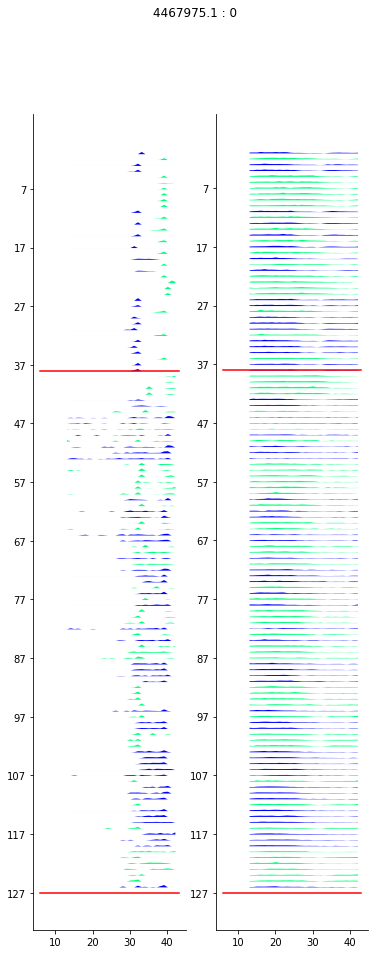

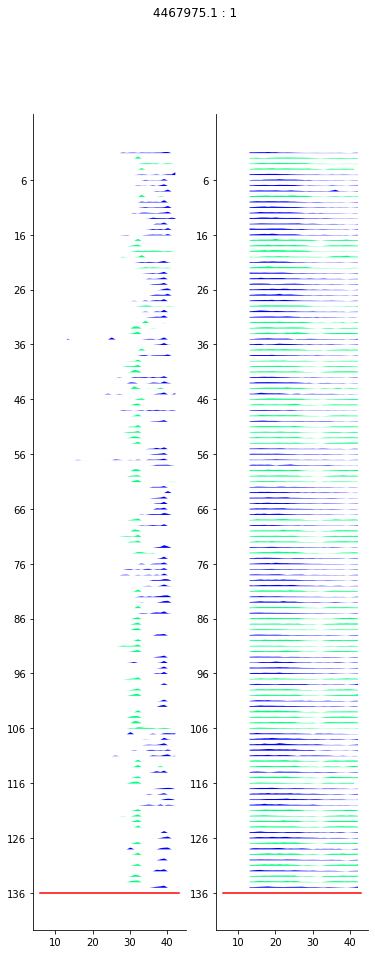

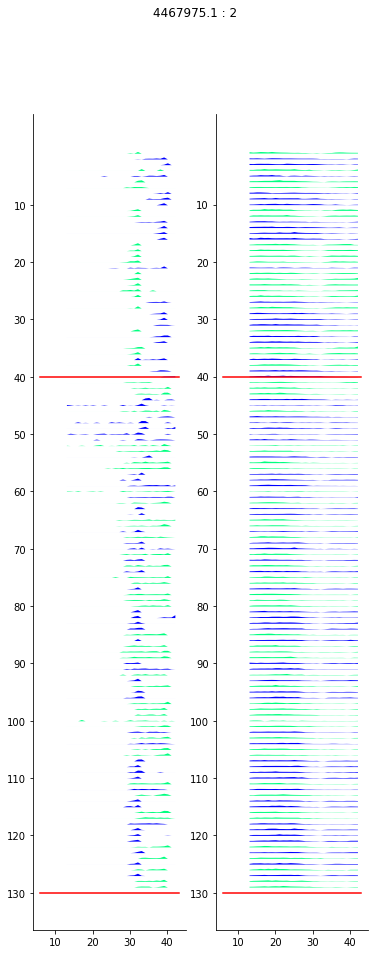

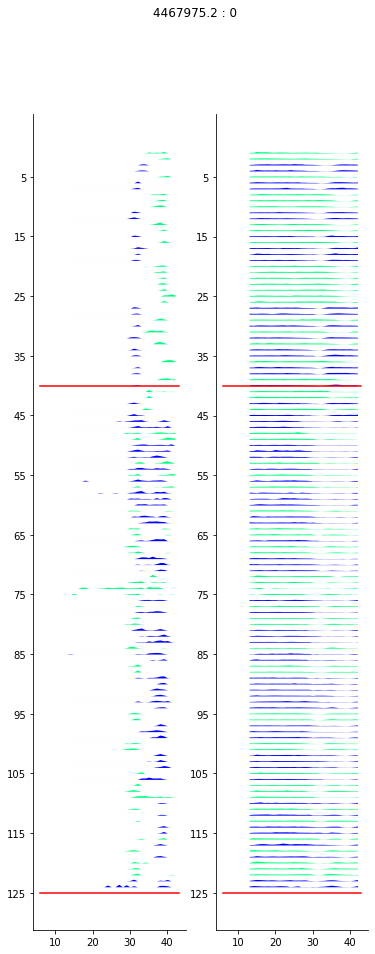

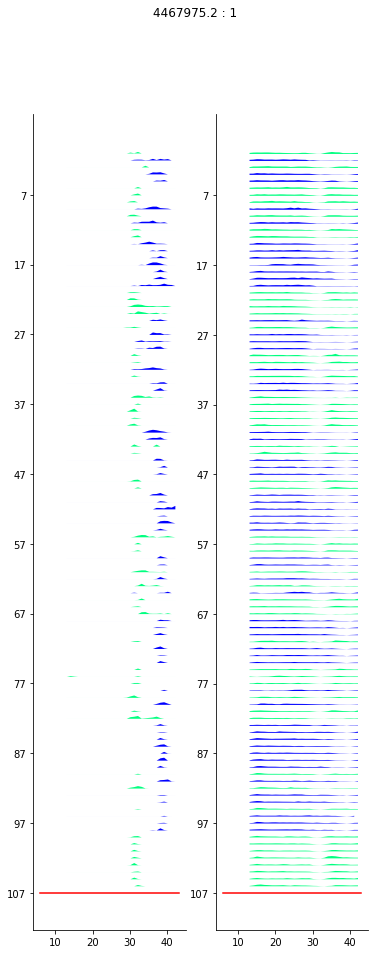

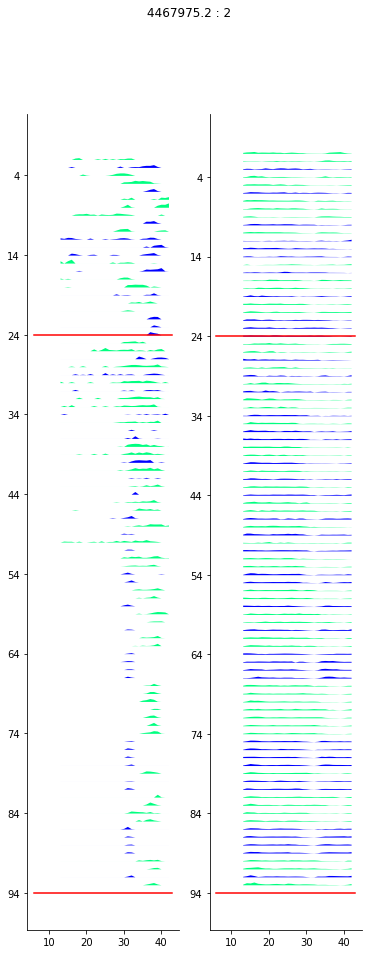

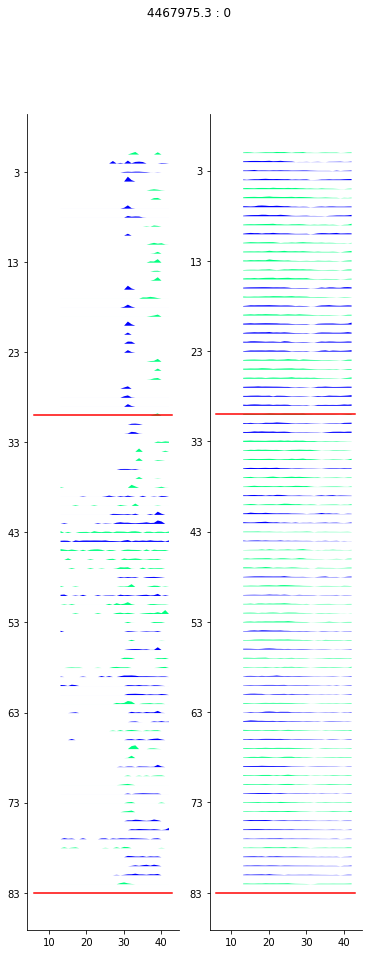

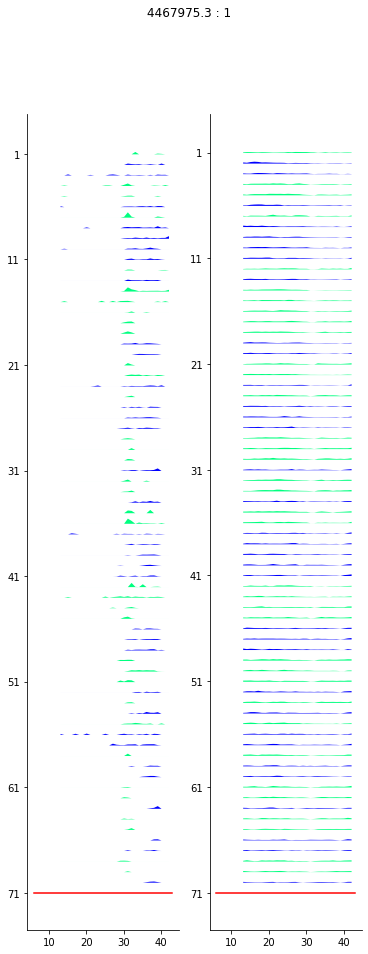

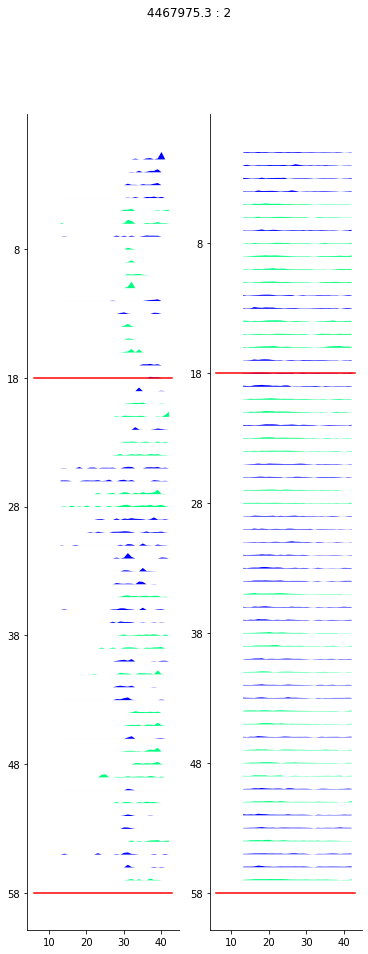

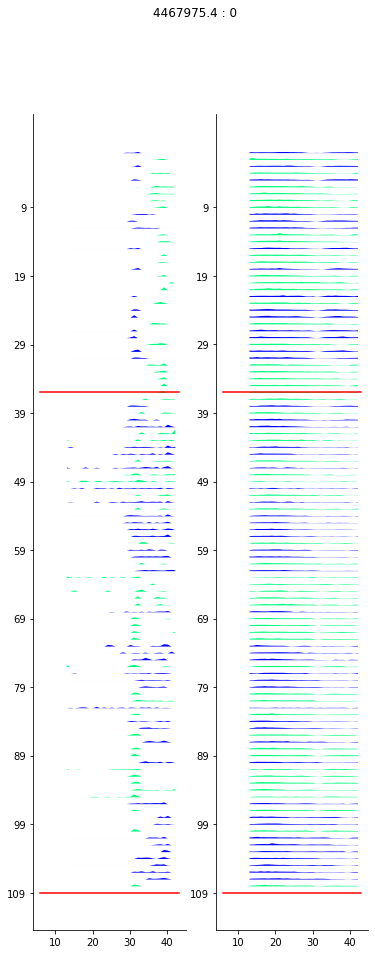

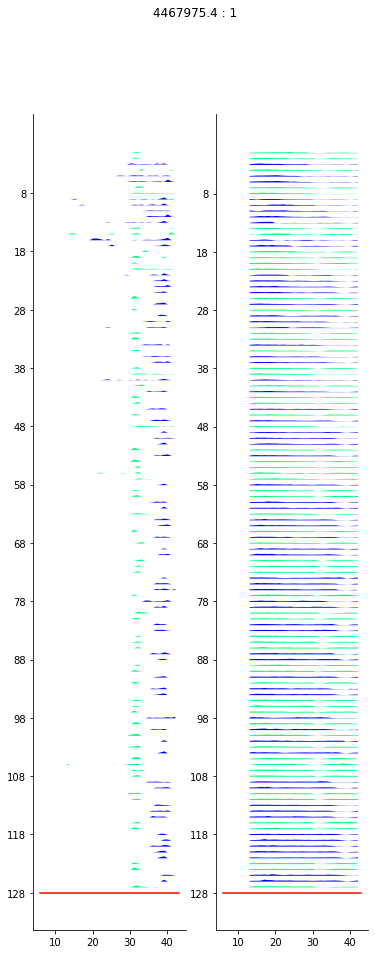

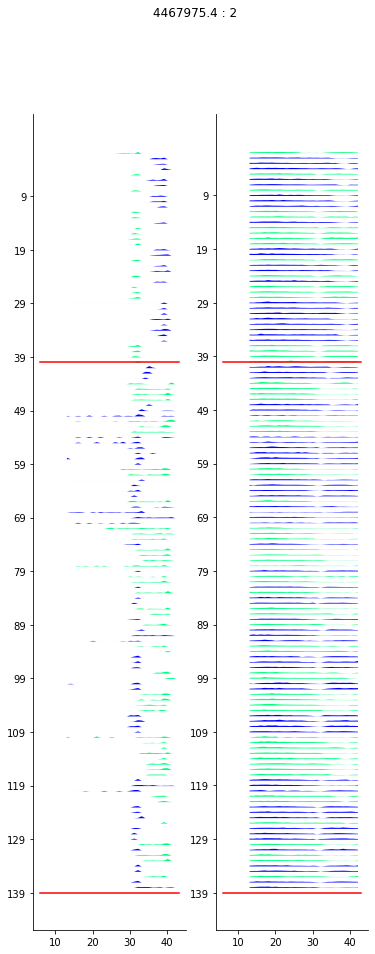

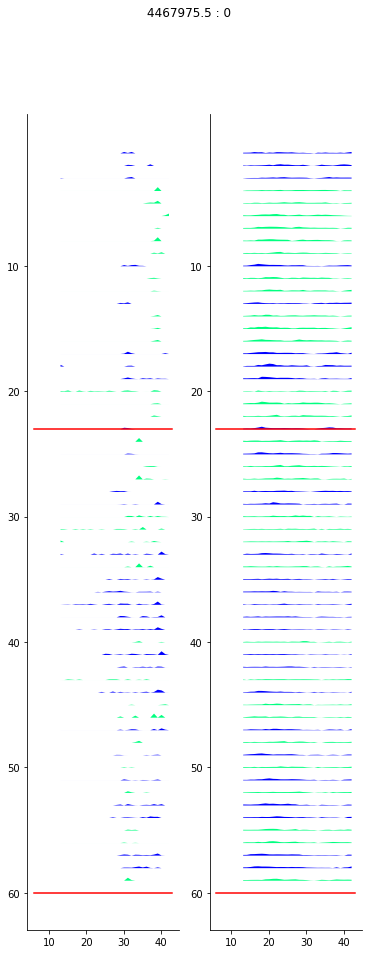

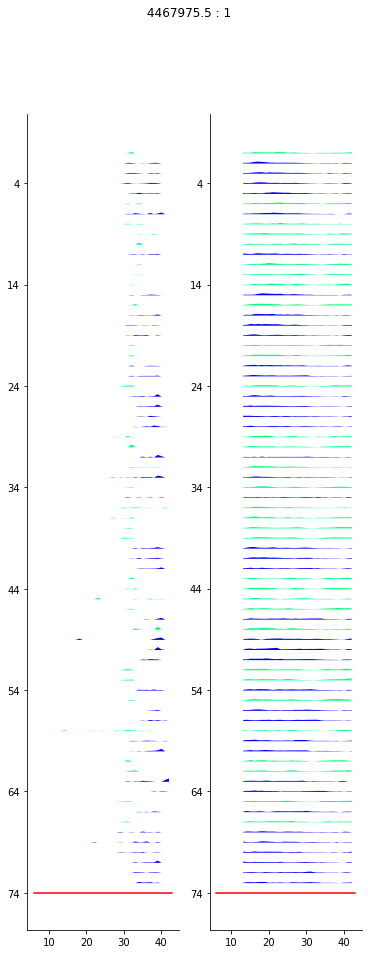

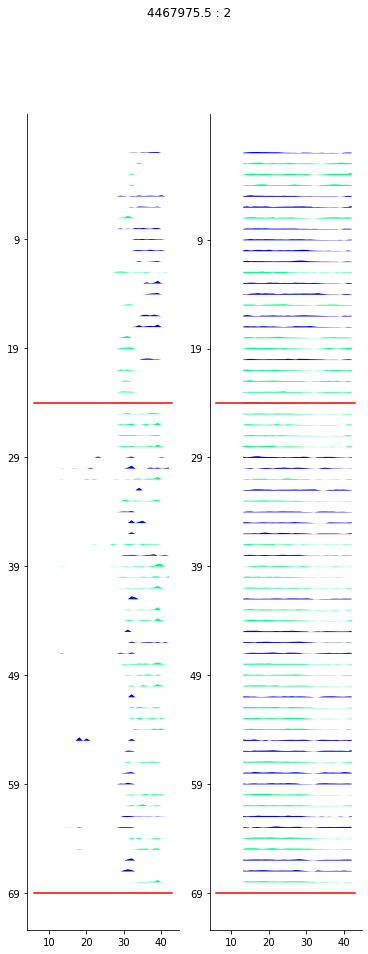

In [101]:
run_groupedsession_plots(KOs_reversals)

4467331.1
0 ({'date': '05_12_2020', 'scene': 'YMaze_LNovel', 'session': 1}, {'date': '05_12_2020', 'scene': 'YMaze_RewardReversal', 'session': 1})


/home/mplitt/repos/TwoPUtils/sess.py:93: UserWarning: skipping checking keys, remaining initialization not guaranteed to work
  warnings.warn("skipping checking keys, remaining initialization not guaranteed to work")


1 ({'date': '06_12_2020', 'scene': 'YMaze_RewardReversal', 'session': 2},)


/home/mplitt/repos/TwoPUtils/sess.py:93: UserWarning: skipping checking keys, remaining initialization not guaranteed to work
  warnings.warn("skipping checking keys, remaining initialization not guaranteed to work")


2 ({'date': '07_12_2020', 'scene': 'YMaze_RewardReversal', 'session': 1}, {'date': '07_12_2020', 'scene': 'YMaze_LNovel', 'session': 1})


/home/mplitt/repos/TwoPUtils/sess.py:93: UserWarning: skipping checking keys, remaining initialization not guaranteed to work
  warnings.warn("skipping checking keys, remaining initialization not guaranteed to work")
/home/mplitt/repos/TwoPUtils/sess.py:93: UserWarning: skipping checking keys, remaining initialization not guaranteed to work
  warnings.warn("skipping checking keys, remaining initialization not guaranteed to work")


4467331.2
0 ({'date': '05_12_2020', 'scene': 'YMaze_LNovel', 'session': 1}, {'date': '05_12_2020', 'scene': 'YMaze_RewardReversal', 'session': 1})


/home/mplitt/repos/TwoPUtils/sess.py:93: UserWarning: skipping checking keys, remaining initialization not guaranteed to work
  warnings.warn("skipping checking keys, remaining initialization not guaranteed to work")
/home/mplitt/repos/TwoPUtils/sess.py:93: UserWarning: skipping checking keys, remaining initialization not guaranteed to work
  warnings.warn("skipping checking keys, remaining initialization not guaranteed to work")


1 ({'date': '06_12_2020', 'scene': 'YMaze_RewardReversal', 'session': 1},)


/home/mplitt/repos/TwoPUtils/sess.py:93: UserWarning: skipping checking keys, remaining initialization not guaranteed to work
  warnings.warn("skipping checking keys, remaining initialization not guaranteed to work")


2 ({'date': '07_12_2020', 'scene': 'YMaze_RewardReversal', 'session': 1}, {'date': '07_12_2020', 'scene': 'YMaze_LNovel', 'session': 1})


/home/mplitt/repos/TwoPUtils/sess.py:93: UserWarning: skipping checking keys, remaining initialization not guaranteed to work
  warnings.warn("skipping checking keys, remaining initialization not guaranteed to work")
/home/mplitt/repos/TwoPUtils/sess.py:93: UserWarning: skipping checking keys, remaining initialization not guaranteed to work
  warnings.warn("skipping checking keys, remaining initialization not guaranteed to work")


4467332.1
0 ({'date': '05_12_2020', 'scene': 'YMaze_LNovel', 'session': 1}, {'date': '05_12_2020', 'scene': 'YMaze_RewardReversal', 'session': 1})


/home/mplitt/repos/TwoPUtils/sess.py:93: UserWarning: skipping checking keys, remaining initialization not guaranteed to work
  warnings.warn("skipping checking keys, remaining initialization not guaranteed to work")
/home/mplitt/repos/TwoPUtils/sess.py:93: UserWarning: skipping checking keys, remaining initialization not guaranteed to work
  warnings.warn("skipping checking keys, remaining initialization not guaranteed to work")


1 ({'date': '06_12_2020', 'scene': 'YMaze_RewardReversal', 'session': 1},)


/home/mplitt/repos/TwoPUtils/sess.py:93: UserWarning: skipping checking keys, remaining initialization not guaranteed to work
  warnings.warn("skipping checking keys, remaining initialization not guaranteed to work")


2 ({'date': '07_12_2020', 'scene': 'YMaze_RewardReversal', 'session': 1}, {'date': '07_12_2020', 'scene': 'YMaze_LNovel', 'session': 1})


/home/mplitt/repos/TwoPUtils/sess.py:93: UserWarning: skipping checking keys, remaining initialization not guaranteed to work
  warnings.warn("skipping checking keys, remaining initialization not guaranteed to work")
/home/mplitt/repos/TwoPUtils/sess.py:93: UserWarning: skipping checking keys, remaining initialization not guaranteed to work
  warnings.warn("skipping checking keys, remaining initialization not guaranteed to work")


4467332.2
0 ({'date': '06_12_2020', 'scene': 'YMaze_LNovel', 'session': 1}, {'date': '06_12_2020', 'scene': 'YMaze_RewardReversal', 'session': 1})


/home/mplitt/repos/TwoPUtils/sess.py:93: UserWarning: skipping checking keys, remaining initialization not guaranteed to work
  warnings.warn("skipping checking keys, remaining initialization not guaranteed to work")
/home/mplitt/repos/TwoPUtils/sess.py:93: UserWarning: skipping checking keys, remaining initialization not guaranteed to work
  warnings.warn("skipping checking keys, remaining initialization not guaranteed to work")


1 ({'date': '06_12_2020', 'scene': 'YMaze_RewardReversal', 'session': 2},)


/home/mplitt/repos/TwoPUtils/sess.py:93: UserWarning: skipping checking keys, remaining initialization not guaranteed to work
  warnings.warn("skipping checking keys, remaining initialization not guaranteed to work")


2 ({'date': '07_12_2020', 'scene': 'YMaze_RewardReversal', 'session': 1}, {'date': '07_12_2020', 'scene': 'YMaze_LNovel', 'session': 1})


/home/mplitt/repos/TwoPUtils/sess.py:93: UserWarning: skipping checking keys, remaining initialization not guaranteed to work
  warnings.warn("skipping checking keys, remaining initialization not guaranteed to work")
/home/mplitt/repos/TwoPUtils/sess.py:93: UserWarning: skipping checking keys, remaining initialization not guaranteed to work
  warnings.warn("skipping checking keys, remaining initialization not guaranteed to work")


4467333.1
0 ({'date': '06_12_2020', 'scene': 'YMaze_LNovel', 'session': 1}, {'date': '06_12_2020', 'scene': 'YMaze_RewardReversal', 'session': 1})


/home/mplitt/repos/TwoPUtils/sess.py:93: UserWarning: skipping checking keys, remaining initialization not guaranteed to work
  warnings.warn("skipping checking keys, remaining initialization not guaranteed to work")
/home/mplitt/repos/TwoPUtils/sess.py:93: UserWarning: skipping checking keys, remaining initialization not guaranteed to work
  warnings.warn("skipping checking keys, remaining initialization not guaranteed to work")


1 ({'date': '07_12_2020', 'scene': 'YMaze_RewardReversal', 'session': 1},)


/home/mplitt/repos/TwoPUtils/sess.py:93: UserWarning: skipping checking keys, remaining initialization not guaranteed to work
  warnings.warn("skipping checking keys, remaining initialization not guaranteed to work")


2 ({'date': '08_12_2020', 'scene': 'YMaze_RewardReversal', 'session': 1}, {'date': '08_12_2020', 'scene': 'YMaze_LNovel', 'session': 1})


/home/mplitt/repos/TwoPUtils/sess.py:93: UserWarning: skipping checking keys, remaining initialization not guaranteed to work
  warnings.warn("skipping checking keys, remaining initialization not guaranteed to work")
/home/mplitt/repos/TwoPUtils/sess.py:93: UserWarning: skipping checking keys, remaining initialization not guaranteed to work
  warnings.warn("skipping checking keys, remaining initialization not guaranteed to work")


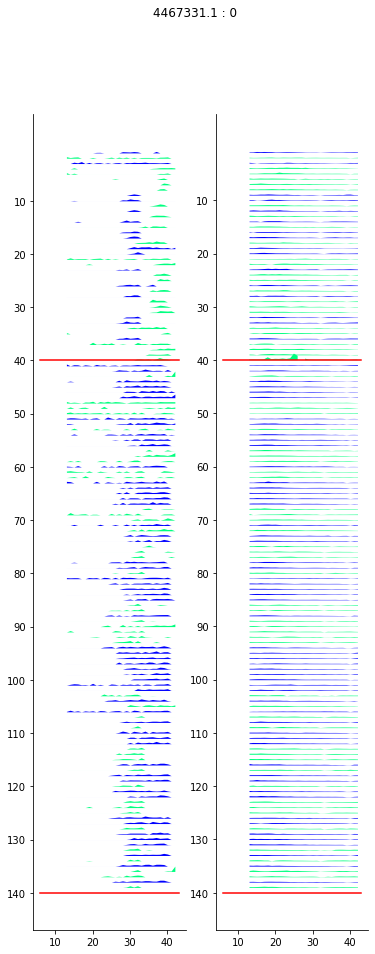

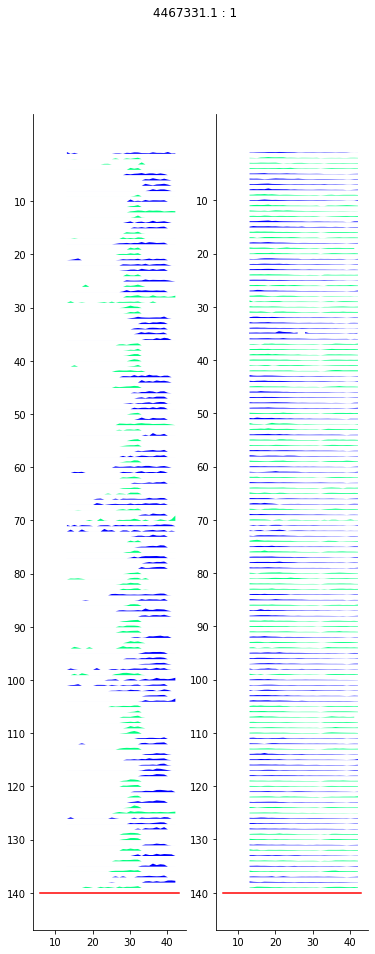

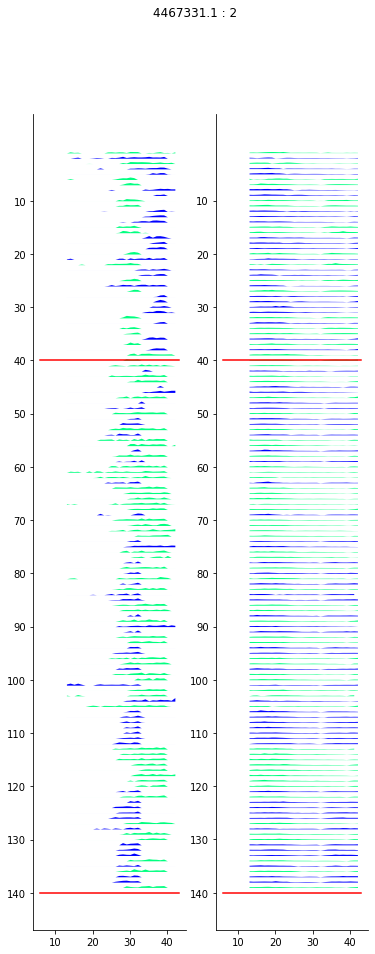

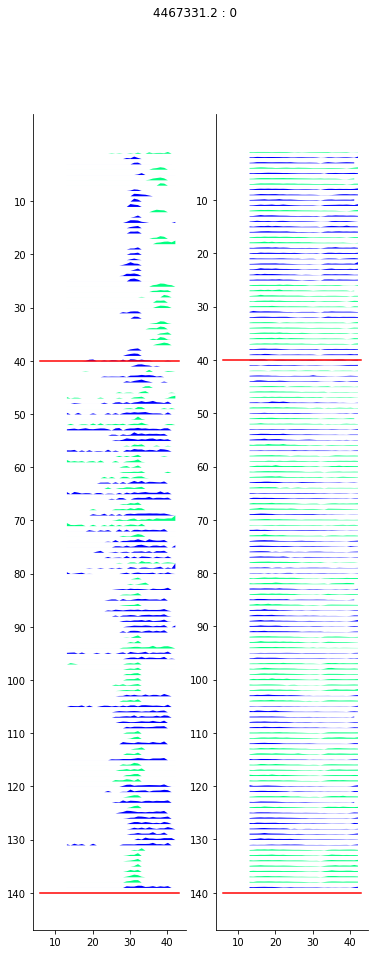

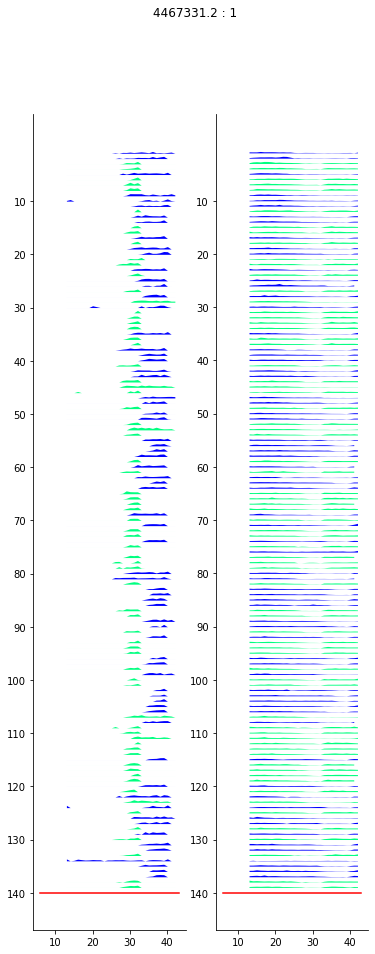

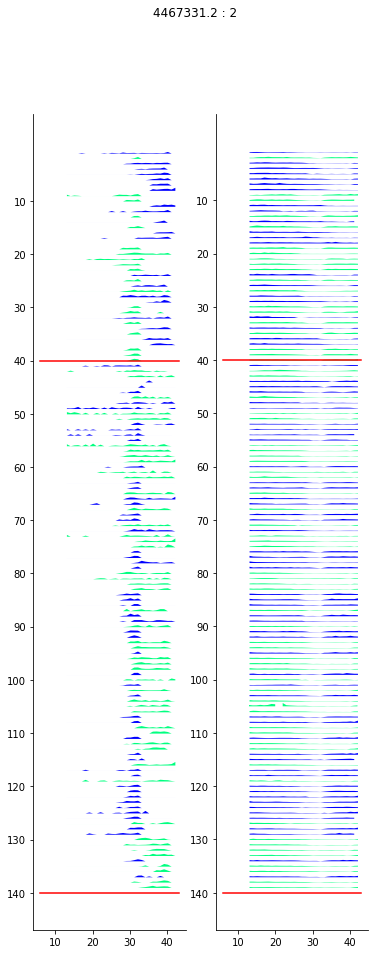

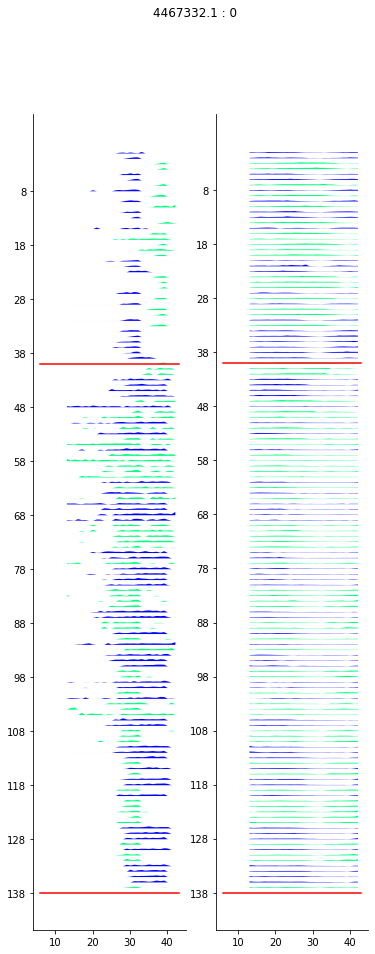

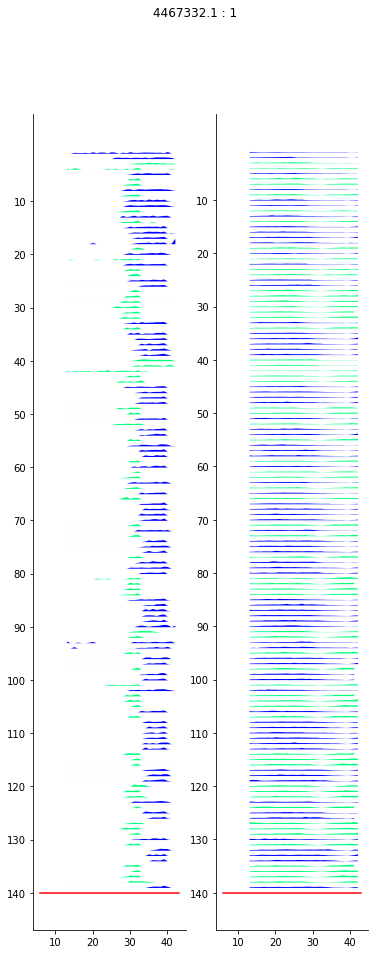

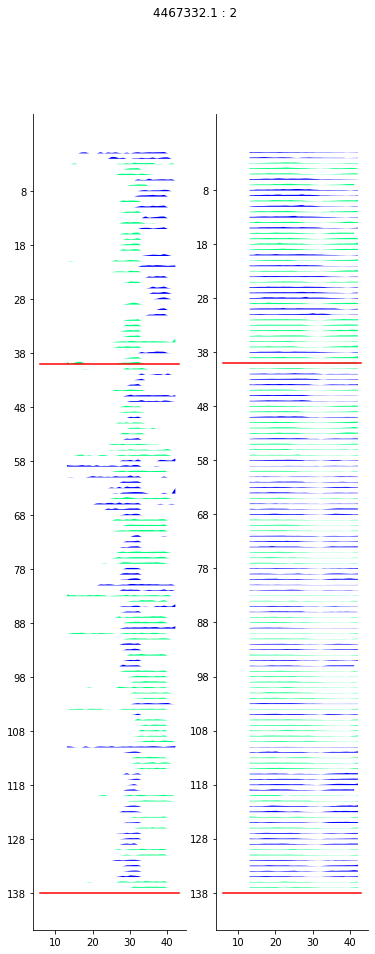

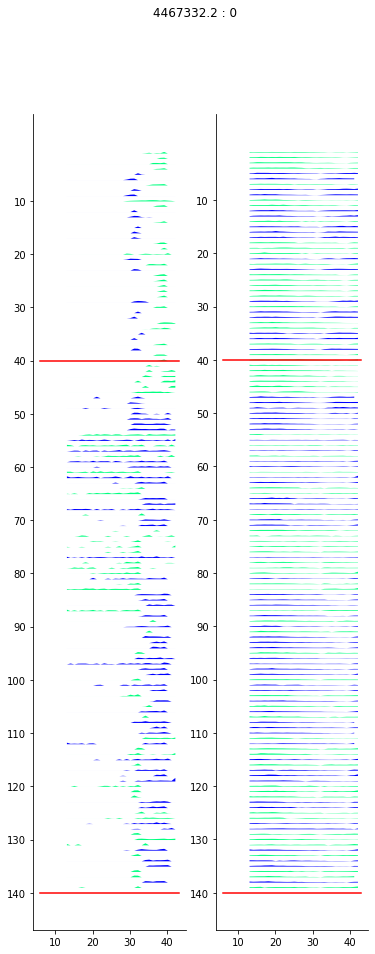

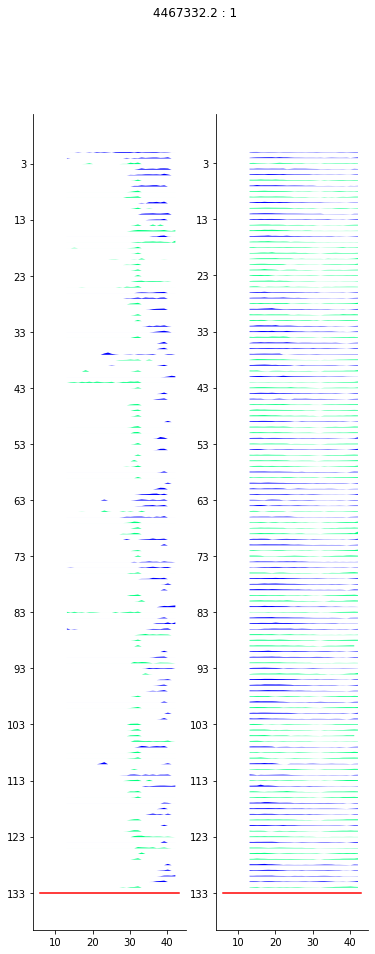

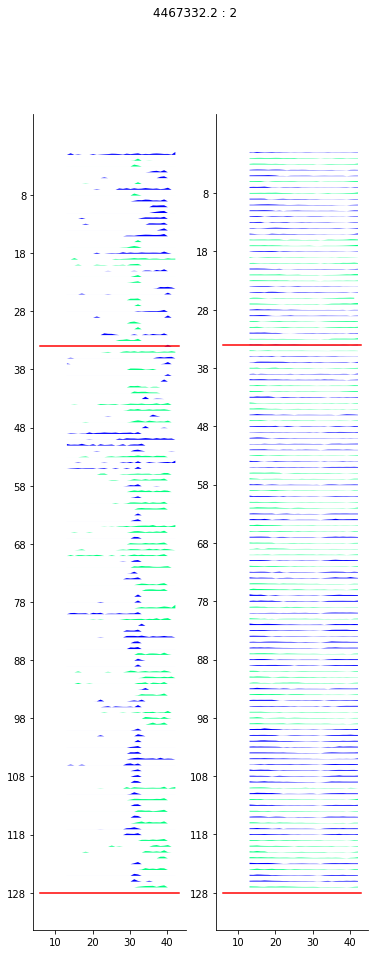

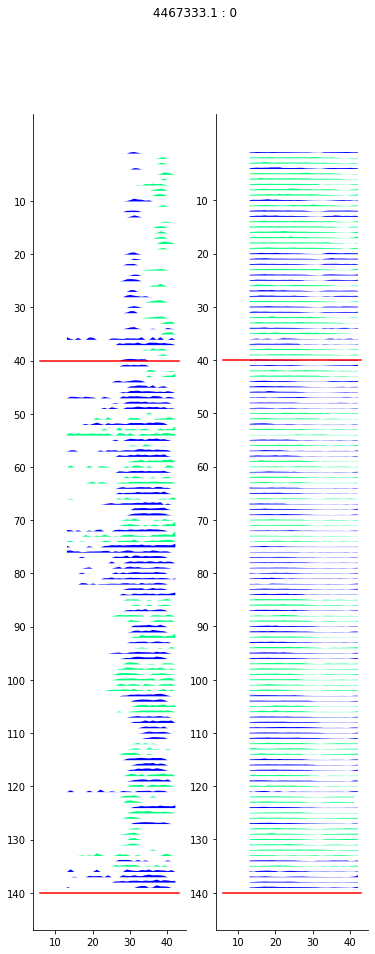

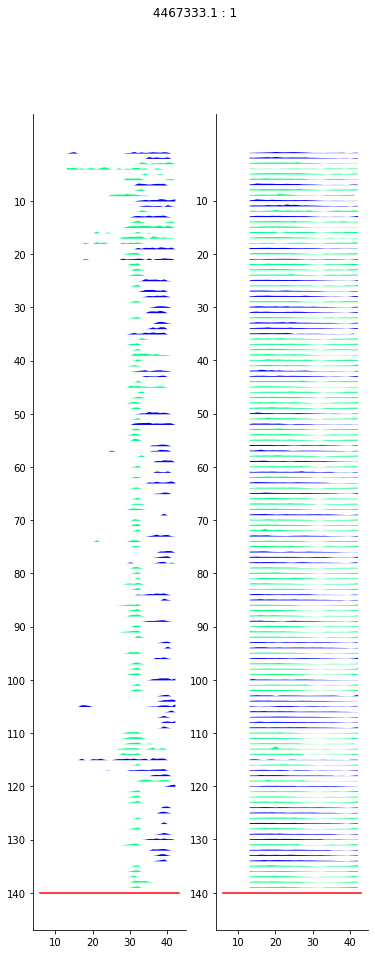

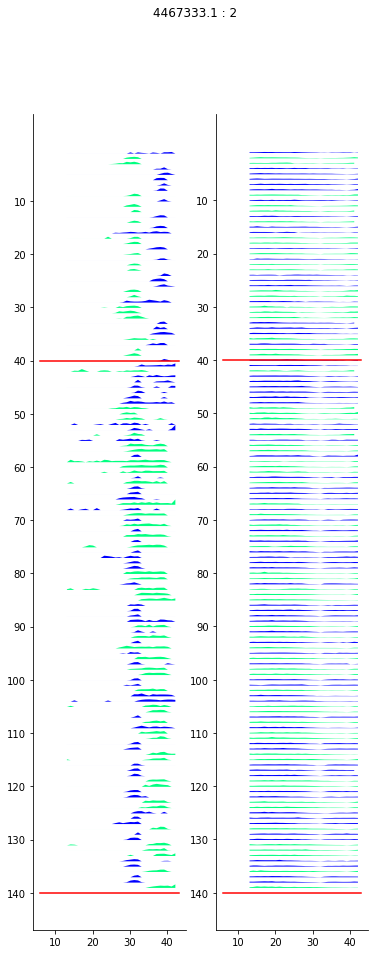

In [107]:
run_groupedsession_plots(CTRLs_reversals)